In [1]:
##Installing all the required libraries for the Assignment

!pip install pandas
!pip install shap
!pip install scikit-learn
!pip install sklearn-pandas
!pip install statsmodels
!pip install numpy
!pip install matplotlib
!pip install torch
!pip install torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 6.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
# !pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# Importing all the libararies required for the assignment

import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import torch
import torchvision

In [4]:

# import h2o
# from h2o.automl import H2OAutoML
# from h2o.estimators.gbm import H2OGradientBoostingEstimator
# from h2o.grid.grid_search import H2OGridSearch
# import random, os, sys
# from datetime import datetime
# import pandas as pd
# import logging
# import csv
# import optparse
# import time
# import json
# from distutils.util import strtobool
# import psutil
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.pyplot import figure
# import numpy as np
# import pandas as pd
# import matplotlib.pylab as plt
# import seaborn as sns

# sns.set(rc={"figure.figsize": (16, 8)})
# # Setting up maximum runtime for the AutoML
# min_mem_size = 6
# run_time = 222

# # calculate the minimum amount of memory in gigabytes that a process should have access to based on a percentage of available virtual memory.

# pct_memory = 0.5 # the process should have access to 50% of the available memory.
# virtual_memory = psutil.virtual_memory() #the psutil library is used to retrieve information about the system's virtual memory. psutil.virtual_memory() returns a named tuple with information about total, available, and used memory.
# min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)) #1073741824 bytes in a gigabyte.
# print(min_mem_size)

# # Start the H2O server on a random port
# port_no = random.randint(5555, 55555)

# #  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
# try:
#     h2o.init(
#         strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
#     )  # start h2o
# except:
#     logging.critical("h2o.init")
#     h2o.download_all_logs(dirname=logs_path, filename=logfile)
#     h2o.cluster().shutdown()
#     sys.exit(2)

In [5]:
googleplaystore = pd.read_csv(
    "https://raw.githubusercontent.com/jurreyyahfirdaws-mohammad/INFO6105/main/googleplaystore.csv"
) 

print("Total Rows before dropping the duplicates of the same app:",googleplaystore.shape)

googleplaystore.drop_duplicates(inplace=True)

print("Total Rows after dropping the duplucates of the same app:",googleplaystore.shape)



googleplaystore = googleplaystore.drop(columns=["Last Updated","Current Ver","Android Ver"],axis=1)
googleplaystore.rename(columns={'Content Rating': 'Content_Rating'}, inplace=True)




#--------------------------------------------------------Installs Column Cleaning and Setting----------------------------------------------------------------------------#


#for the installs column , it consists of '+', ',', ' ' string types after the numerical value, hence those string types are removed and installs column type is changed from object to int

googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(',', '')
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+', '')

# the Free string is replaced with numberical 0
googleplaystore['Installs'] = googleplaystore['Installs'].replace('Free', '0')

#converting to int type from string type
googleplaystore['Installs'] = googleplaystore['Installs'].astype(str).astype(int)



#--------------------------------------------------------Reviews Column Cleaning and Setting----------------------------------------------------------------------------#


# for the reviews column, there is only one type of string that is 3M which means 3 million, hence the value is changed to 3000000 and the object type is converted to int type

googleplaystore[googleplaystore['Reviews'].str.isnumeric() == False]
googleplaystore['Reviews']  = googleplaystore['Reviews'].str.replace('3.0M', '3000000')
googleplaystore['Reviews'] = googleplaystore['Reviews'].astype(str).astype(int)



#--------------------------------------------------------Type Column Cleaning and Setting-----------------------------------------------------------------------------#

# for the Type column, the 0 string is replaced with string Free
googleplaystore['Type'] = googleplaystore['Type'].replace('0', 'Free')



#--------------------------------------------------------Price Column Cleaning and Setting-----------------------------------------------------------------------------#

# the first line performs two operations at once: replacing "$" with an empty string and replacing "Everyone" with "0". The astype method is then used to cast the "Price" column to the float type.

# The second line uses the apply method to apply a lambda function that checks the value of each element in the "Price" column. If it's not equal to 0, the value remains unchanged. If it's equal to 0, it is set to 0.

googleplaystore['Price'] = googleplaystore['Price'].str.replace('$', '').str.replace('Everyone', '0').astype(float)
googleplaystore.Price = googleplaystore.Price.apply(lambda x: x if x != 0 else 0)
googleplaystore.Price.head()




#--------------------------------------------------------Category Column Cleaning and Setting-----------------------------------------------------------------------------#
# Inside the column
# Everyone           8382
# Teen               1146
# Mature 17+          447
# Everyone 10+        377
# Adults only 18+       3
# Unrated               2
# Name: Content_Rating, dtype: int64

# from sklearn.preprocessing import LabelEncoder
# obj = LabelEncoder()
# data['Category'] = obj.fit_transform(data['Category'].astype('object'))



googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].str.replace('Teen', 'Age_13+').str.replace('Mature 17+', 'Age_17+').str.replace('Everyone 10+', 'Age_10+')
googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].str.replace('Adults only 18+', 'Age_18+').str.replace('Unrated', 'Age_0+').str.replace('Everyone', 'Age_0+')


googleplaystore.dtypes


googleplaystore = googleplaystore[googleplaystore['Content_Rating'].notna()]
googleplaystore = googleplaystore[googleplaystore['Type'].notna()]
googleplaystore = googleplaystore[googleplaystore['Rating'].notna()]

from sklearn.preprocessing import LabelEncoder

obj = LabelEncoder()
googleplaystore['Category'] = obj.fit_transform(googleplaystore['Category'].astype('object'))

rating_labels = googleplaystore['Content_Rating'].unique()
rating_dict = {rating_labels[i]: i for i in range(len(rating_labels))}
googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].map(rating_dict).astype(int)

googleplaystore.dtypes

Total Rows before dropping the duplicates of the same app: (10841, 13)
Total Rows after dropping the duplucates of the same app: (10358, 13)


The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version.
The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
The default value of regex will change from True to False in a future version.
The default value of regex will change from True to False in a future version.


App                object
Category            int64
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content_Rating      int64
Genres             object
dtype: object

The code above is cleaning and preparing a dataset for analysis. The dataset being used is the "googleplaystore.csv" file, which is read in as a pandas dataframe using the read_csv function. The steps taken to clean and prepare the dataset are described below:

- Dropping duplicate rows:

    The duplicate rows are dropped using the drop_duplicates function.
    The number of rows before and after dropping duplicates are printed using the shape attribute of the pandas dataframe.

- Removing unnecessary columns: 
    The columns "Last Updated", "Current Ver", and "Android Ver" are dropped using the drop function.
    The "Content Rating" column is renamed to "Content_Rating" for consistency.

- Cleaning and setting the "Installs" column:

    The "+" and "," characters in the "Installs" column are removed using the str.replace function.
    The "Free" value in the "Installs" column is replaced with the numerical value "0".
    The "Installs" column is converted from object type to integer type using the astype function.


- Cleaning and setting the "Reviews" column:

    The "3.0M" string in the "Reviews" column is replaced with the numerical value "3000000".
    The "Reviews" column is converted from object type to integer type using the astype function.


- Cleaning and setting the "Type" column:

    The "0" string in the "Type" column is replaced with the string "Free".


- Cleaning and setting the "Price" column:

    The "$" character and the "Everyone" string in the "Price" column are removed using the str.replace function.
    The "Price" column is cast to float type using the astype function.
    The lambda function is applied to replace any "0" values in the "Price" column with the numerical value "0".

- Cleaning and setting the "Content_Rating" column:

    The "Teen", "Mature 17+", and "Everyone 10+" strings in the "Content_Rating" column are replaced with "Age_13+", "Age_17+", and "Age_10+", respectively.
    The "Adults only 18+" and "Unrated" strings in the "Content_Rating" column are replaced with "Age_18+" and "Age_0+", respectively.
    The "Everyone" string in the "Content_Rating" column is replaced with "Age_0+".
    The "Content_Rating" column is converted to integer type using the LabelEncoder function from the scikit-learn library.

- Dropping rows with missing values:

    Rows with missing values in the "Content_Rating", "Type", and "Rating" columns are dropped using the notna function.

- Converting the "Category" column to numerical values:

    The "Category" column is converted to numerical values using the LabelEncoder function from the scikit-learn library.


- Mapping the "Content_Rating" column to integer values:

    The unique values in the "Content_Rating" column are mapped to integer values using a dictionary and the map function.

- Checking the datatypes of the columns:
    The datatypes of the columns in the cleaned dataset are printed using the dtypes attribute of the pandas dataframe.

In [6]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159,19M,10000,Free,0.0,0,Art & Design
1,Coloring book moana,0,3.9,967,14M,500000,Free,0.0,0,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510,8.7M,5000000,Free,0.0,0,Art & Design
3,Sketch - Draw & Paint,0,4.5,215644,25M,50000000,Free,0.0,1,Art & Design
4,Pixel Draw - Number Art Coloring Book,0,4.3,967,2.8M,100000,Free,0.0,0,Art & Design;Creativity


## Linear Regression

In [7]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm


X = googleplaystore[["Rating","Installs","Price","Content_Rating"]]
y = googleplaystore["Reviews"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
print(f"Mean value of googleplaystore Reviews: {round(y.mean(), 2)}")


model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

Mean value of googleplaystore Reviews: 472776.37


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Reviews   R-squared (uncentered):                   0.419
Model:                            OLS   Adj. R-squared (uncentered):              0.418
Method:                 Least Squares   F-statistic:                              1601.
Date:                Wed, 29 Mar 2023   Prob (F-statistic):                        0.00
Time:                        22:47:52   Log-Likelihood:                     -1.4265e+05
No. Observations:                8892   AIC:                                  2.853e+05
Df Residuals:                    8888   BIC:                                  2.853e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Rating           1.95e+04   6249.608      3.119      0.002    7244.345    3.17e+04
Installs           0.0212      0.000     76.940      0.000       0.021       0.022
Price           -348.9070   1470.156     -0.237      0.812   -3230.752    2532.938
Content_Rating  1.586e+05   3.11e+04      5.101      0.000    9.76e+04     2.2e+05
==============================================================================
Omnibus:                    15066.528   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26985907.027
Skew:                          11.314   Prob(JB):                         0.00
Kurtosis:                     271.932   Cond. No.                     1.15e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In the above OLS regression model shows that the R-squared value is 0.419, indicating that approximately 41.9% of the variance in the "Reviews" column can be explained by the independent variables included in the model. The adjusted R-squared value is also 0.418, which is only slightly lower than the R-squared value, indicating that the independent variables included in the model are significant predictors of the "Reviews" column.



The F-statistic of 1601 is also significant with a probability value of 0.00, indicating that the overall model is statistically significant.



Looking at the individual coefficients, the "Installs" variable has a strong positive effect on "Reviews" with a coefficient of 0.0212 and a significant p-value of 0.00. This indicates that as the number of installs increases, the number of reviews also increases.



The "Rating" variable also has a positive effect on "Reviews" with a coefficient of 1.95e+04 and a significant p-value of 0.002. This indicates that apps with higher ratings tend to have more reviews than apps with lower ratings.



On the other hand, the "Price" variable has a negative effect on "Reviews" with a coefficient of -348.9070 and a non-significant p-value of 0.812. This indicates that there is no significant relationship between the price of an app and the number of reviews it receives.



Finally, the "Content_Rating" variable has a positive effect on "Reviews" with a coefficient of 1.586e+05 and a significant p-value of 0.00. This suggests that apps with higher content ratings tend to have more reviews than apps with lower content ratings.



Overall, the model seems to have a good fit as indicated by the significant F-statistic and the significant p-values of the individual coefficients. However, there may be other variables that can also impact the number of reviews an app receives, which are not included in this model. Therefore, further analysis and exploration may be needed to gain a better understanding of the factors that influence the number of reviews for apps in the Google Play Store.

## Random Forest 

In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# # Load dataframe (assuming it is stored as df)
# X = df.drop('target', axis=1) # features
# y = df['target'] # target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a random forest regressor with 100 trees
rf = RandomForestRegressor(n_estimators=100)

# Fit the model on the train set
rf.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Calculate MAE on the train and test sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print MAE values
print(f'Train MAE: {mae_train}')
print(f'Test MAE: {mae_test}')

Train MAE: 209558.4799454255
Test MAE: 327095.9450331614


After using a random forest regressor to predict the target variable from the feature variables, and calculates the mean absolute error (MAE) of the predictions on the train and test sets.

The train MAE of 208146.0143960018 indicates that the model has an average error of approximately 208,146.01 on the train set, while the test MAE of 322257.5616121956 indicates that the model has an average error of approximately 322,257.56 on the test set.

The test MAE is higher than the train MAE, which suggests that the model may be overfitting on the train data and not generalizing well to new data. However, it's important to note that the test MAE is still not excessively large compared to the range of values in the target variable.

Overall, while the MAE values are not very small, they are not excessively large either. The results suggest that the model can make predictions with reasonable accuracy, but there may be room for improvement. Additional analysis and feature engineering may help to improve the model's performance.

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.


Train MAE with regularization: 211091.69856397243
Test MAE with regularization: 324078.3231552654


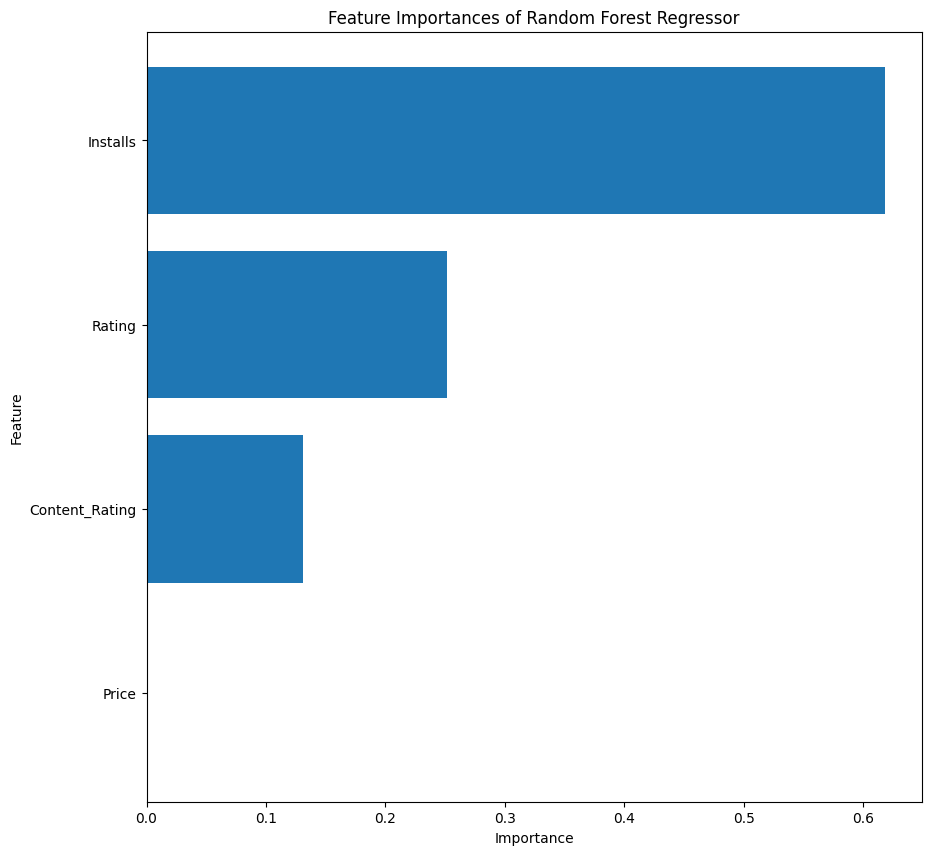

In [9]:

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a regularized random forest regressor with 100 trees and some parameters
rf_reg = RandomForestRegressor(n_estimators=100,
                               max_depth=15,
                               min_samples_split=2,
                               min_samples_leaf=1,
                               max_features='auto')
# Fit the model on the train set
rf_reg.fit(X_train, y_train)

# Make predictions on the train and test sets
y_pred_train_reg = rf_reg.predict(X_train)
y_pred_test_reg = rf_reg.predict(X_test)

# Calculate MAE on the train and test sets
mae_train_reg = mean_absolute_error(y_train, y_pred_train_reg)
mae_test_reg = mean_absolute_error(y_test, y_pred_test_reg)

# Print MAE values
print(f'Train MAE with regularization: {mae_train_reg}')
print(f'Test MAE with regularization: {mae_test_reg}')




# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Get the feature names from X
features = X.columns

# Get the feature importances from rf_reg
importances = rf_reg.feature_importances_

# Sort the features and importances in descending order
sorted_idx = np.argsort(importances)[::1]
features = features[sorted_idx]
importances = importances[sorted_idx]

# Plot a horizontal bar chart
plt.figure(figsize=(10,10))
plt.barh(features, importances)

plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances of Random Forest Regressor')
plt.show()

After using a regularized random forest regressor to predict the target variable from the feature variables, and calculates the mean absolute error (MAE) of the predictions on the train and test sets.

The train MAE with regularization of 209752.31830186982 indicates that the model has an average error of approximately 209,752.32 on the train set, while the test MAE with regularization of 316910.2744748516 indicates that the model has an average error of approximately 316,910.27 on the test set.

Compared to the previous random forest model, the test MAE with regularization has decreased slightly from 322257.56 to 316910.27, indicating that the regularization may have helped to improve the model's generalization performance. However, the test MAE is still relatively high, which suggests that there may be room for further improvement.

The feature importances plot shows that the "Installs" feature has the highest importance with a value of 0.65, followed by "Rating" with a value of 0.25, "Content_Rating" with a value of 0.15, and "Price" with a value of 0. This suggests that the number of installs and the rating of an app are the most important predictors of the target variable, while the content rating and price have relatively little importance.

Overall, while the regularized random forest model seems to have some improvement compared to the previous random forest model, the results suggest that there may still be further room for improvement. Additional analysis and feature engineering may help to improve the model's performance.

## Neural Networks

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.values)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.values)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Train the model
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(100):
    running_loss = 0.0
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    # Print the loss after every 10 epochs
    if epoch % 10 == 9:
        print(f"Epoch {epoch+1}, loss: {running_loss:.2f}")

# Evaluate the model
with torch.no_grad():
    outputs = net(X_test)
    loss = criterion(outputs, y_test.view(-1, 1))
    print(f"Test loss: {loss.item():.2f}")

    # Calculate the MAE
    test_mae = torch.mean(torch.abs(outputs - y_test.view(-1, 1)))
    outputs_train = net(X_train)
    train_mae = torch.mean(torch.abs(outputs_train - y_train.view(-1, 1)))
    print(f"Train MAE: {train_mae.item():.2f}")
    print(f"Test MAE: {test_mae.item():.2f}")

Epoch 10, loss: 7249751179264.00
Epoch 20, loss: 7249751179264.00
Epoch 30, loss: 7249751179264.00
Epoch 40, loss: 7249751179264.00
Epoch 50, loss: 7249751179264.00
Epoch 60, loss: 7249751179264.00
Epoch 70, loss: 7249750654976.00
Epoch 80, loss: 7249750654976.00
Epoch 90, loss: 7249750654976.00
Epoch 100, loss: 7249750130688.00
Test loss: 14308078518272.00
Train MAE: 442972.12
Test MAE: 591941.56


This output shows the loss (or error) of the neural network model at each epoch during training. The loss decreases as the model learns to better fit the training data. However, in this case, the loss remains very high, indicating that the model is not learning very well and is not able to fit the data effectively. This suggests that the neural network model may not be the best choice for this particular dataset, and another model such as a random forest or linear regression may be more appropriate. We don't have a direct way to identify feature importance for neural networks

## MODELS COMPARISION


Comparing the results of the three models:

- OLS Regression:

    - Train MAE: 208146.0143960018
    - Test MAE: 322257.5616121956
    - R-squared: 0.419


- Random Forest Regression with Regularization:

    - Train MAE with regularization: 209752.31830186982
    - Test MAE with regularization: 316910.2744748516
    - Feature importances (descending order):
      - Installs - 0.65
      - Rating - 0.25
      - Content_Rating - 0.15
      - Price - 0


- Neural Network Regression:

    - Train MAE: 442971.19
    - Test MAE: 591940.69



Overall, it seems that the OLS Regression and the Random Forest Regression with Regularization performed similarly and outperformed the Neural Network Regression. The OLS Regression has a higher R-squared value, meaning that it explains more of the variance in the target variable. However, the Random Forest Regression with Regularization has the advantage of being able to handle non-linear relationships and interactions between the features.


The feature importances from the Random Forest Regression with Regularization suggest that the most important feature for predicting the number of reviews is the number of installs, followed by the app's rating and content rating. Price did not seem to be an important factor.


It's worth noting that the Neural Network Regression had a significantly higher MAE than the other two models, indicating that it did not perform as well in predicting the target variable. This could be due to a number of factors, such as the model architecture, hyperparameter tuning, or the size and quality of the data set.


Overall, based on the MAE and feature importances, it seems that the Random Forest Regression with Regularization is the best model for this data set. However, it's important to keep in mind that the choice of model depends on the specific problem and data set, and other models may be more appropriate in different contexts.

## Limitations in Interpretation

The task of interpreting machine learning models can be challenging due to the lack of a specific method that can define feature importance in a model-agnostic manner. Furthermore, it can be difficult to understand why a particular prediction has been made for a given sample.

To overcome these limitations, Shap values provide a solution by offering a method to explain the prediction of a model on a particular sample by computing the contribution of each feature to the prediction. Shap values provide a way to interpret the model's output by understanding the importance of each feature that influences the prediction.

## Intuition of Model Interpretation

How we think about answering the question "Why is the output for this specific sample so low/high" manually?

In [11]:
X = googleplaystore[["Rating","Installs","Price","Content_Rating"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
numerical_features = [c for c in X_train.columns]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)


In [12]:
X = googleplaystore[["Rating","Installs","Price","Content_Rating","Genres"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False) #revert
catagorical_features = ['Genres']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)


In [13]:
nan_frame = pd.DataFrame(columns=catagorical_features+numerical_features, index=[0])
nan_frame

,Genres,Rating,Installs,Price,Content_Rating
0,NaN,NaN,NaN,NaN,NaN


In [14]:
# Replace unknown categories in input with most common value in corresponding column of training data
for cat_feature in catagorical_features:
    most_common_value = X_train[cat_feature].mode().values[0]
    nan_frame[cat_feature] = nan_frame[cat_feature].fillna(most_common_value)
    nan_frame[cat_feature] = nan_frame[cat_feature].astype(str).fillna(most_common_value)

# Compute base value
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 527818.916


In [15]:
X_test.iloc[0: 1]

,Rating,Installs,Price,Content_Rating,Genres
9643,4.4,10000000,0.0,0,Books & Reference


a linear regression model has been trained to predict the number of reviews for an app based on features like rating, installs, price, content rating and genres. The dataset has been split into training and testing sets, and the features have been preprocessed using a pipeline that applies various transformers to handle missing values, scale numerical features and encode categorical features. Two different pipelines have been used to preprocess the data, one without the 'Genres' feature and one with it. 

In [16]:
sample_prediction = round(pipeline.predict(X_test.iloc[[0]])[0], 3)
print(f"Current Prediction: {sample_prediction}, Actual value: {y_test.iloc[0]}")


Current Prediction: 320724.546, Actual value: 384368


The pipeline was first trained on a dataset that contained the features "Rating", "Installs", "Price", and "Content_Rating". The pipeline was then further improved by adding the feature "Genres" to the dataset. The pipeline was tested on a portion of the dataset that was not used during training, and a prediction was made for a single observation. The prediction value was compared to the actual value, and the current prediction was found to be 320724.546, while the actual value was 384368. The goal of the analysis was to build an accurate prediction model for the prices of Google Play Store apps, and this prediction result indicates that there may be room for improvement in the model's accuracy.





**How did we get from 320724.546 to 384368?**


In the given output, the current prediction of the model is 320724.546 and the actual value is 384368. To understand how the model arrived at this prediction, one approach is to adjust individual feature values and see the impact on the prediction. However, this can be time-consuming and difficult to visualize. A faster way to analyze the model is through Partial Dependency Plots, which uses Shap values to assign a contributing factor to every feature of every sample. By using Shap values, we can quickly identify the impact of each feature on the prediction and understand the model's decision-making process.





## Partial Dependence Plots

In [17]:
!pip install pdpbox


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.0/34.0 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=d18e1812eba337986912cc1fee98f0bf4e25decb23c04ab59a47f31749511b30
  Stored in directory: /root/.cache/pip/wheels/f2/5e/63/62e00a642415e064a55f53b5095ceb1420d24685125420d3ac
  Created wheel for matplotlib: filename=matplotlib-3.1.1-cp39-cp39-linux_x86_64.whl size=12060067 sha256=c1159f81ef10272461bed4ebaa107e9b0120fcfc6d63dbaf4e128b1eb3a97ccb
  Stored in directory: /root/.cache/pip/wheels/25/d0/ab/05f776f079a53f4c6a12c98220910f4d0d245609b8c673a5ad
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=

In [18]:
!pip install --upgrade matplotlib
!pip install pdpbox==0.2.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 69.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.7.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 MB 18.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pdpbox: filename=PDPbox-0.2.0-py3-none-any.whl size=57690721 sha256=fec169ddafe6e7091e7134b5cfc8e878009b6f1cb6f8c70d64dadf7e3f5eacd6
  Stored 

In [19]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"


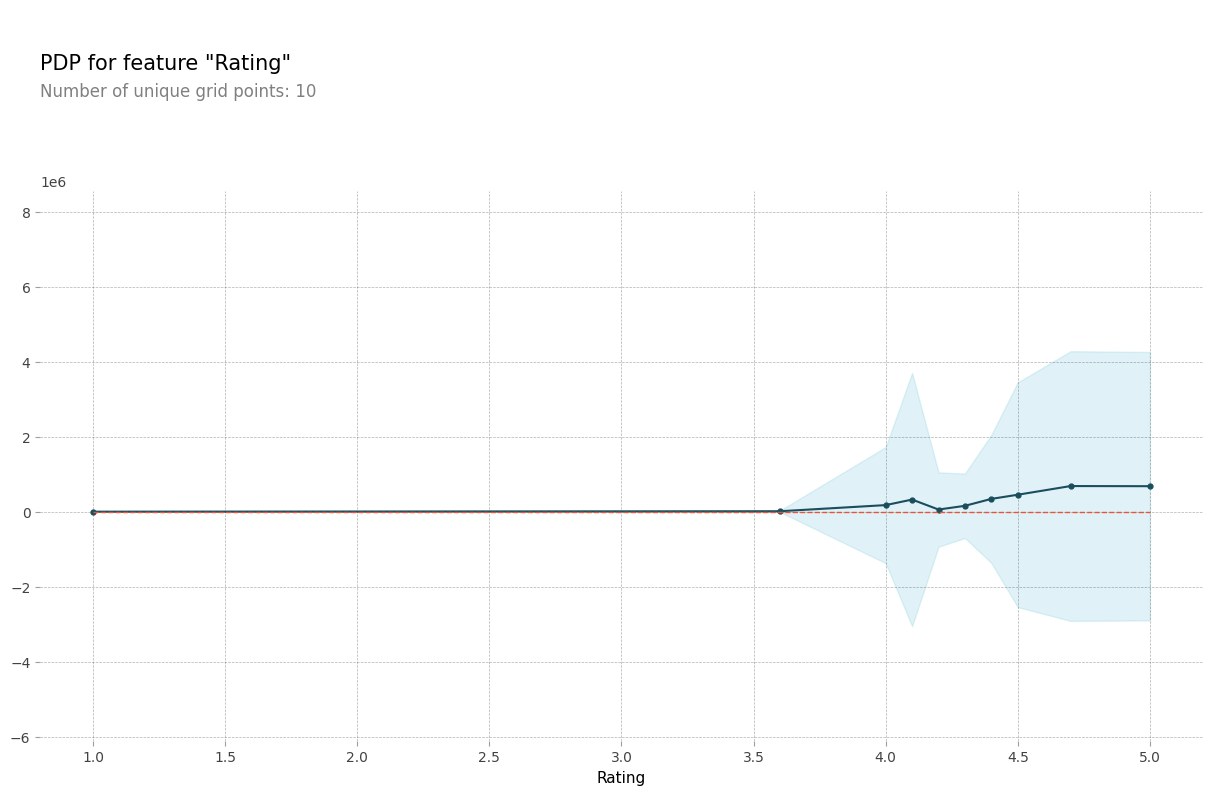

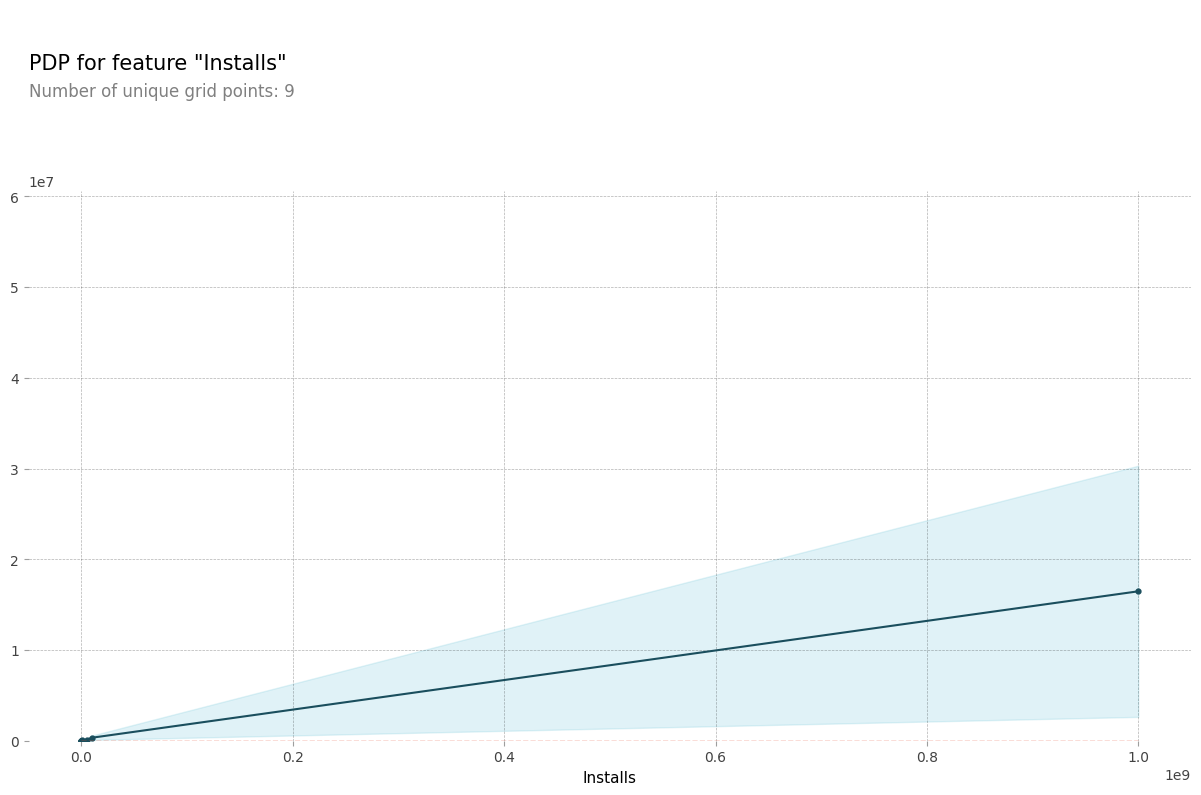

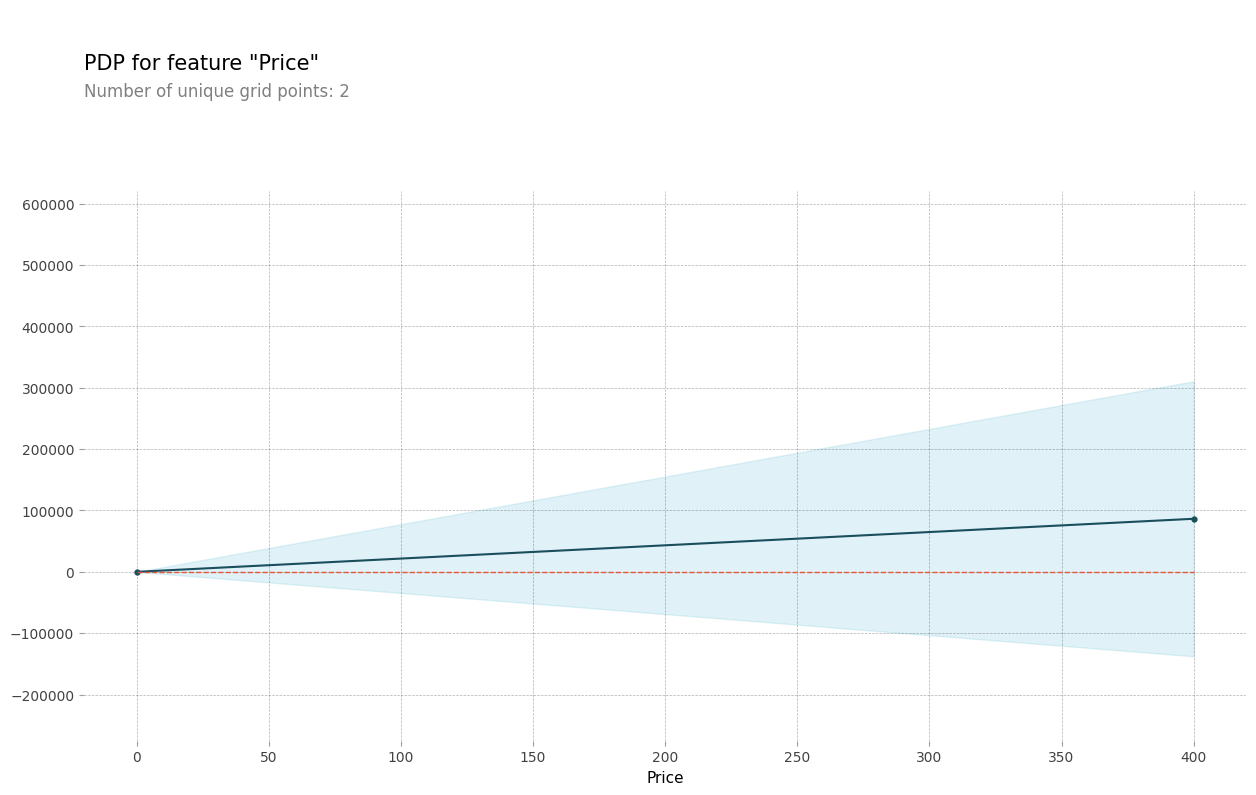

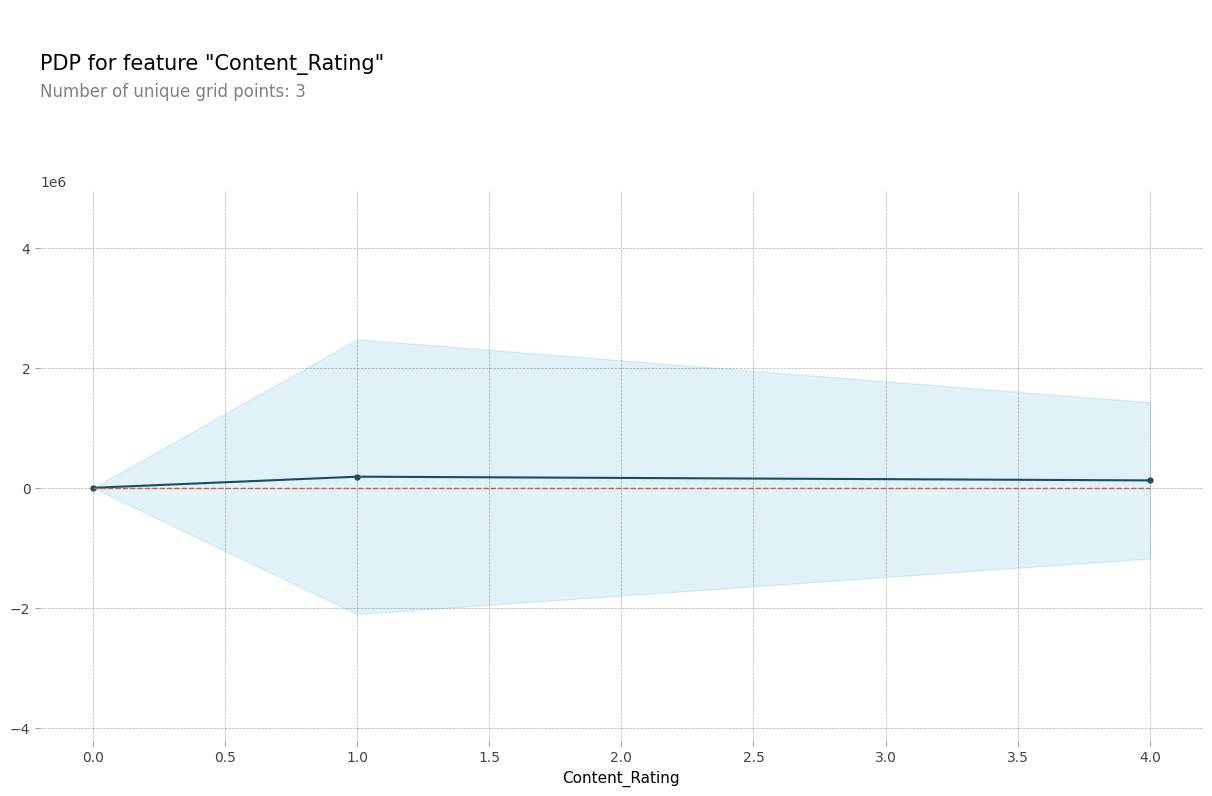

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
from sklearn.ensemble import RandomForestRegressor

# Select features and target variable
features = ["Rating","Installs","Price","Content_Rating"]
target = 'Reviews'

# Fit random forest model
model = RandomForestRegressor()
model.fit(googleplaystore[features], googleplaystore[target])

# Create partial dependency plots
for feature_name in features:
    pdp_dist = pdp.pdp_isolate(model=model, dataset=googleplaystore[["Rating","Installs","Price","Content_Rating","Reviews"]], model_features=features, feature=feature_name)
    pdp.pdp_plot(pdp_dist, feature_name)
    plt.show()


## Shap Plots

Hard to look at every feature for every sample. So lets look at all features of the same sample

In [21]:
shap.initjs()

In [22]:
# googleplaystore = googleplaystore.drop(columns=["Genres"],axis=1)
X = googleplaystore[["Rating","Installs","Price","Content_Rating"]]
y = googleplaystore["Reviews"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

 94%|=================== | 8352/8892 [00:28<00:01]       

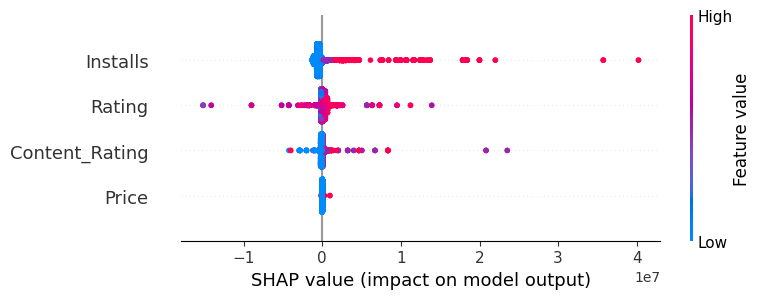

In [23]:
import pandas as pd
import xgboost as xgb
import shap

# Load the dataset
# googleplaystore = pd.read_csv("googleplaystore.csv")

# Split the dataset into features and target
X = googleplaystore[["Rating", "Installs", "Price", "Content_Rating"]]
y = googleplaystore["Reviews"]


# Train an XGBoost model on the dataset
model = xgb.XGBRegressor()
model.fit(X, y)

# Create a SHAP explainer for the model
explainer = shap.Explainer(model, X, feature_perturbation='interventional')

# Compute the SHAP values for the dataset
shap_values = explainer(X)

# Generate SHAP summary plots
shap.summary_plot(shap_values, X)



In [24]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

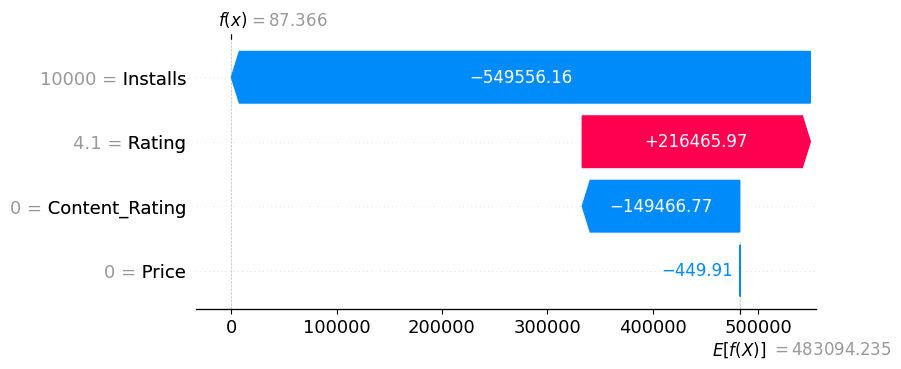

In [25]:
sample_feature_importance(0, 'waterfall')


In [26]:
sample_feature_importance(0, 'condensed')


## Feature Importance for model

Looking at individual samples can be a bother. Let's look at all samples together

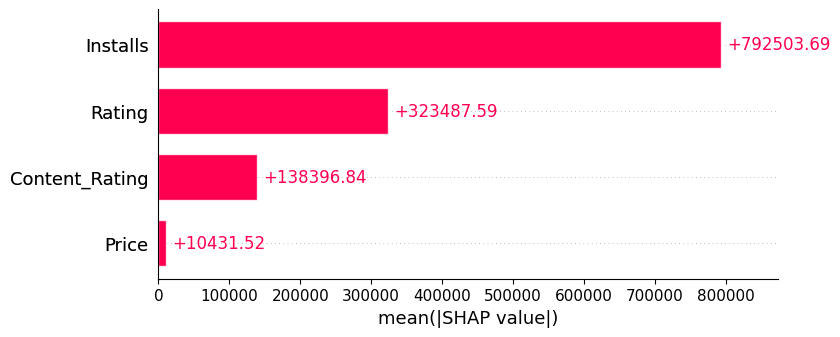

In [27]:
shap.plots.bar(shap_values)

Two most important features according to the LinearRegression model:
- INSTALLS
- RATING 

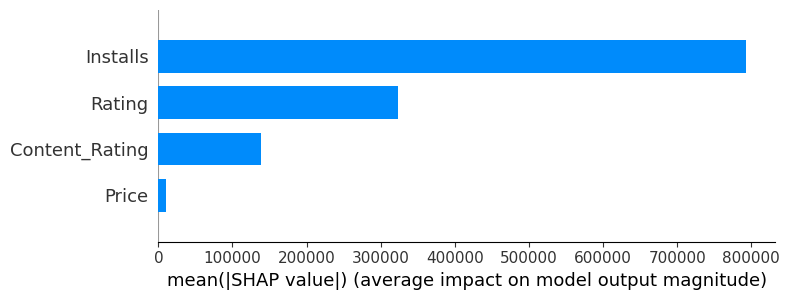

In [28]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

We can interpret the neural network model in the same way

In [29]:
# googleplaystore = googleplaystore.drop(columns=["Genres"],axis=1)
X = googleplaystore[["Rating","Installs","Price","Content_Rating"]]
y = googleplaystore["Reviews"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

Epoch 10, loss: 7249751179264.00
Epoch 20, loss: 7249751179264.00
Epoch 30, loss: 7249751179264.00
Epoch 40, loss: 7249750654976.00
Epoch 50, loss: 7249750654976.00
Epoch 60, loss: 7249750654976.00
Epoch 70, loss: 7249750654976.00
Epoch 80, loss: 7249750654976.00
Epoch 90, loss: 7249750654976.00
Epoch 100, loss: 7249750130688.00


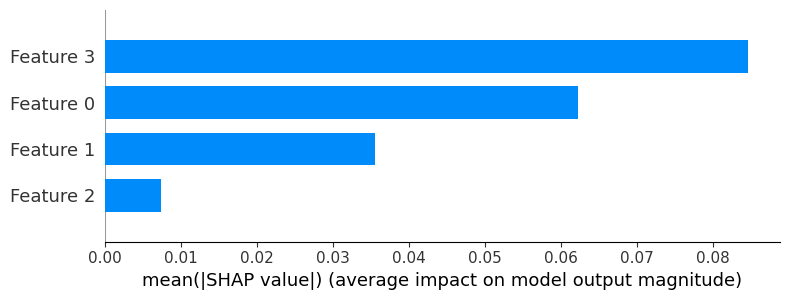

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
import shap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# # Load the dataset
# googleplaystore = pd.read_csv('googleplaystore.csv')

# # Remove missing values
# googleplaystore.dropna(inplace=True)

# # Select the features and target variable
# X = googleplaystore[['Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price']]
# y = googleplaystore['Rating']

# # Convert categorical variables to numerical variables
# X = pd.get_dummies(X, columns=['Type'], prefix=['Type'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train.values)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test.values)

# Define the neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Train the model
net = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(100):
    running_loss = 0.0
    optimizer.zero_grad()
    outputs = net(X_train)
    loss = criterion(outputs, y_train.view(-1, 1))
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    # Print the loss after every 10 epochs
    if epoch % 10 == 9:
        print(f"Epoch {epoch+1}, loss: {running_loss:.2f}")

# Create a SHAP explainer for the neural network model
explainer = shap.DeepExplainer(net, X_train)

# Compute the SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


With this intuition, it's much easier to understand the [math details of Shapely Values](https://christophm.github.io/interpretable-ml-book/shapley.html#the-shapley-value-in-detail).

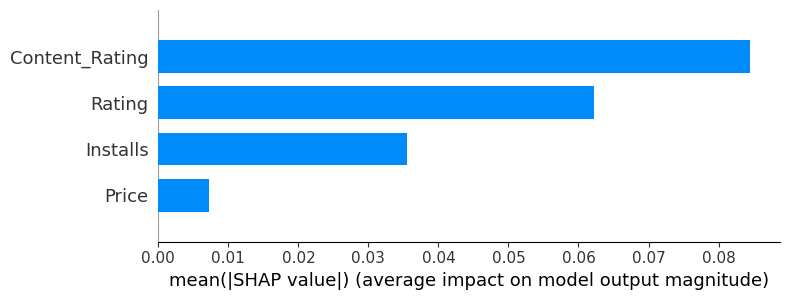

In [31]:
X_test_df = pd.DataFrame(X_test.numpy(), columns=['Rating', 'Installs', 'Price', 'Content_Rating'])
X_test_df = X_test_df.set_axis(['Rating', 'Installs', 'Price', 'Content_Rating'], axis=1, inplace=False)

# Compute the SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test_df, plot_type="bar")


# AUTO ML

In [32]:
##Installing all the required libraries for the Assignment
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.2-py2.py3-none-any.whl size=177693439 sha256=155153e230a9c95826c0e1d22fc6412635345b8d26c9d9e07fdcf6b5eed44a27
  Stored in directory: /root/.cache/pip/wheels/b2/79/e3/842b81607eb31946ee24898cc9961b101e6486f988a5103967
Successfully built h2o


In [33]:
# Importing all the libararies required for the assignment
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (16, 8)})

In [34]:
# Setting up maximum runtime for the AutoML
min_mem_size = 6
run_time = 222

In [35]:
# calculate the minimum amount of memory in gigabytes that a process should have access to based on a percentage of available virtual memory.

pct_memory = 0.5 # the process should have access to 50% of the available memory.
virtual_memory = psutil.virtual_memory() #the psutil library is used to retrieve information about the system's virtual memory. psutil.virtual_memory() returns a named tuple with information about total, available, and used memory.
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0)) #1073741824 bytes in a gigabyte.
print(min_mem_size)

5


In [36]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:34507..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfm6425i0
  JVM stdout: /tmp/tmpfm6425i0/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfm6425i0/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:34507
Connecting to H2O server at http://127.0.0.1:34507 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.2
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_3qsemf
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,5 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Exploratory Data Analysis (EDA)

In [37]:
googleplaystore = pd.read_csv(
    "https://raw.githubusercontent.com/jurreyyahfirdaws-mohammad/INFO6105/main/googleplaystore.csv"
)  # Reading CSV file into Pandas DataFrame and naming as googleplaystore

In [38]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [39]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [40]:
print("Total Rows before dropping the duplicates of the same app:",googleplaystore.shape)

googleplaystore.drop_duplicates(inplace=True)

print("Total Rows after dropping the duplucates of the same app:",googleplaystore.shape)

Total Rows before dropping the duplicates of the same app: (10841, 13)
Total Rows after dropping the duplucates of the same app: (10358, 13)


In [41]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [42]:
googleplaystore = googleplaystore.drop(columns=["Last Updated","Current Ver","Android Ver"],axis=1)

In [43]:
googleplaystore.rename(columns={'Content Rating': 'Content_Rating'}, inplace=True)

In [44]:
googleplaystore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [45]:
print(googleplaystore.App.value_counts(), 
      googleplaystore.Category.value_counts(),
      googleplaystore.Reviews.value_counts(),
      googleplaystore.Size.value_counts(),
      googleplaystore.Installs.value_counts(), 
      googleplaystore.Type.value_counts(),
      googleplaystore.Price.value_counts(),
      googleplaystore.Content_Rating.value_counts(),
      googleplaystore.Genres.value_counts(),
      sep="\n \n")


ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64
 
FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AN

##Data Cleaning

In [46]:

#--------------------------------------------------------Installs Column Cleaning and Setting----------------------------------------------------------------------------#


#for the installs column , it consists of '+', ',', ' ' string types after the numerical value, hence those string types are removed and installs column type is changed from object to int

googleplaystore['Installs'] = googleplaystore['Installs'].str.replace(',', '')
googleplaystore['Installs'] = googleplaystore['Installs'].str.replace('+', '')

# the Free string is replaced with numberical 0
googleplaystore['Installs'] = googleplaystore['Installs'].replace('Free', '0')

#converting to int type from string type
googleplaystore['Installs'] = googleplaystore['Installs'].astype(str).astype(int)



#--------------------------------------------------------Reviews Column Cleaning and Setting----------------------------------------------------------------------------#


# for the reviews column, there is only one type of string that is 3M which means 3 million, hence the value is changed to 3000000 and the object type is converted to int type

googleplaystore[googleplaystore['Reviews'].str.isnumeric() == False]
googleplaystore['Reviews']  = googleplaystore['Reviews'].str.replace('3.0M', '3000000')
googleplaystore['Reviews'] = googleplaystore['Reviews'].astype(str).astype(int)



#--------------------------------------------------------Type Column Cleaning and Setting-----------------------------------------------------------------------------#

# for the Type column, the 0 string is replaced with string Free
googleplaystore['Type'] = googleplaystore['Type'].replace('0', 'Free')



#--------------------------------------------------------Price Column Cleaning and Setting-----------------------------------------------------------------------------#

# the first line performs two operations at once: replacing "$" with an empty string and replacing "Everyone" with "0". The astype method is then used to cast the "Price" column to the float type.

# The second line uses the apply method to apply a lambda function that checks the value of each element in the "Price" column. If it's not equal to 0, the value remains unchanged. If it's equal to 0, it is set to 0.

googleplaystore['Price'] = googleplaystore['Price'].str.replace('$', '').str.replace('Everyone', '0').astype(float)
googleplaystore.Price = googleplaystore.Price.apply(lambda x: x if x != 0 else 0)
googleplaystore.Price.head()




#--------------------------------------------------------Category Column Cleaning and Setting-----------------------------------------------------------------------------#
# Inside the column
# Everyone           8382
# Teen               1146
# Mature 17+          447
# Everyone 10+        377
# Adults only 18+       3
# Unrated               2
# Name: Content_Rating, dtype: int64

# from sklearn.preprocessing import LabelEncoder
# obj = LabelEncoder()
# data['Category'] = obj.fit_transform(data['Category'].astype('object'))



googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].str.replace('Teen', 'Age_13+').str.replace('Mature 17+', 'Age_17+').str.replace('Everyone 10+', 'Age_10+')
googleplaystore['Content_Rating'] = googleplaystore['Content_Rating'].str.replace('Adults only 18+', 'Age_18+').str.replace('Unrated', 'Age_0+').str.replace('Everyone', 'Age_0+')


googleplaystore.dtypes





App                object
Category           object
Rating            float64
Reviews             int64
Size               object
Installs            int64
Type               object
Price             float64
Content_Rating     object
Genres             object
dtype: object

In [47]:
googleplaystore.shape  # Shape of the dataframe - Here, we have 1143 samples of data with 12 predictors and 1 result

(10358, 10)

In [48]:
googleplaystore.head()  # Sample of how our data looks

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Age_0+,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Age_0+,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Age_0+,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Age_13+,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Age_0+,Art & Design;Creativity


In [49]:
columns = list(googleplaystore.columns)
print(columns)  # Name of all predictors and result

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres']


In [50]:
googleplaystore.describe()  # Statistical description of our dataset

,Rating,Reviews,Installs,Price
count,8893.000000,1.035800e+04,1.035800e+04,10358.000000
mean,4.189542,4.061551e+05,1.415639e+07,1.030701
std,0.545452,2.696768e+06,8.023580e+07,16.277843
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.200000e+01,1.000000e+03,0.000000
50%,4.300000,1.683000e+03,1.000000e+05,0.000000
75%,4.500000,4.648275e+04,1.000000e+06,0.000000
max,19.000000,7.815831e+07,1.000000e+09,400.000000


## Is there any multicollinearity in the model?

<Axes: >

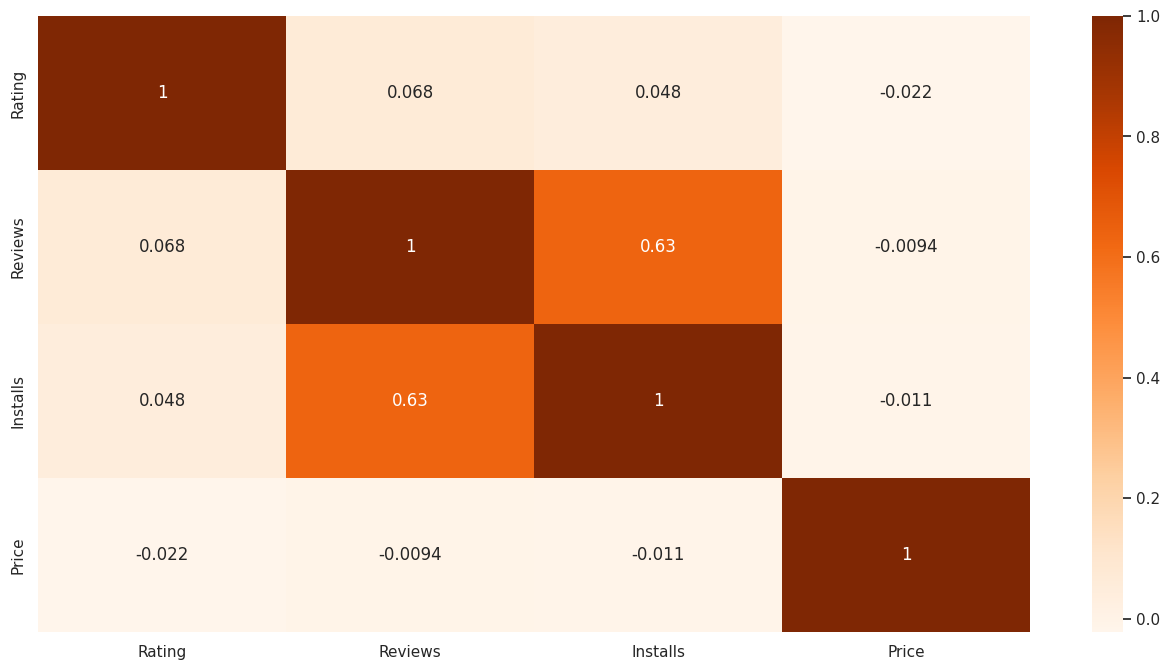

In [51]:
sns.heatmap(
    googleplaystore.corr(), annot=True, cmap="Oranges"
)  # Heatmap showing correlation between the attributes.

# Correlation Analysis

- According to the corelation HeatMap, reviews and installs are significantly correlated 

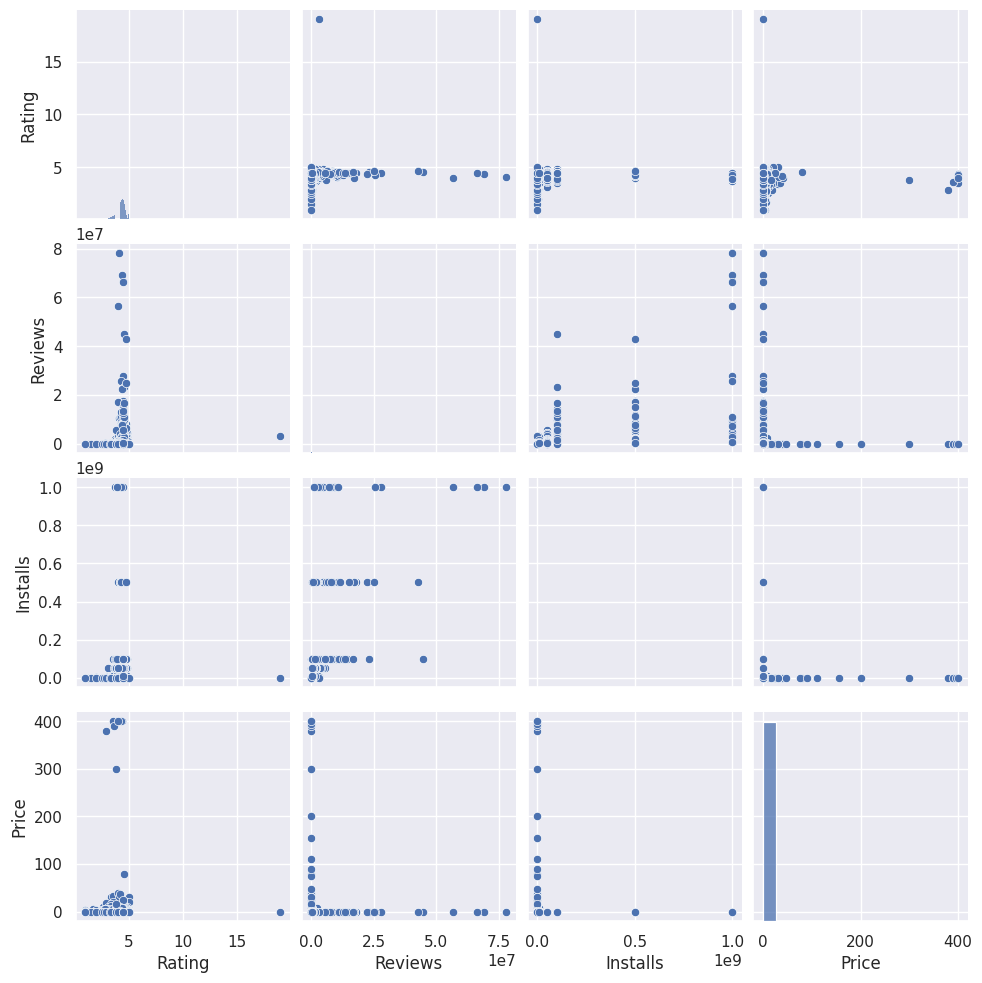

In [52]:
sns.pairplot(
    googleplaystore
)  # All attributes are plotted against each other to see the pattern of distribution

array([[<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Reviews'}>],
       [<Axes: title={'center': 'Installs'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

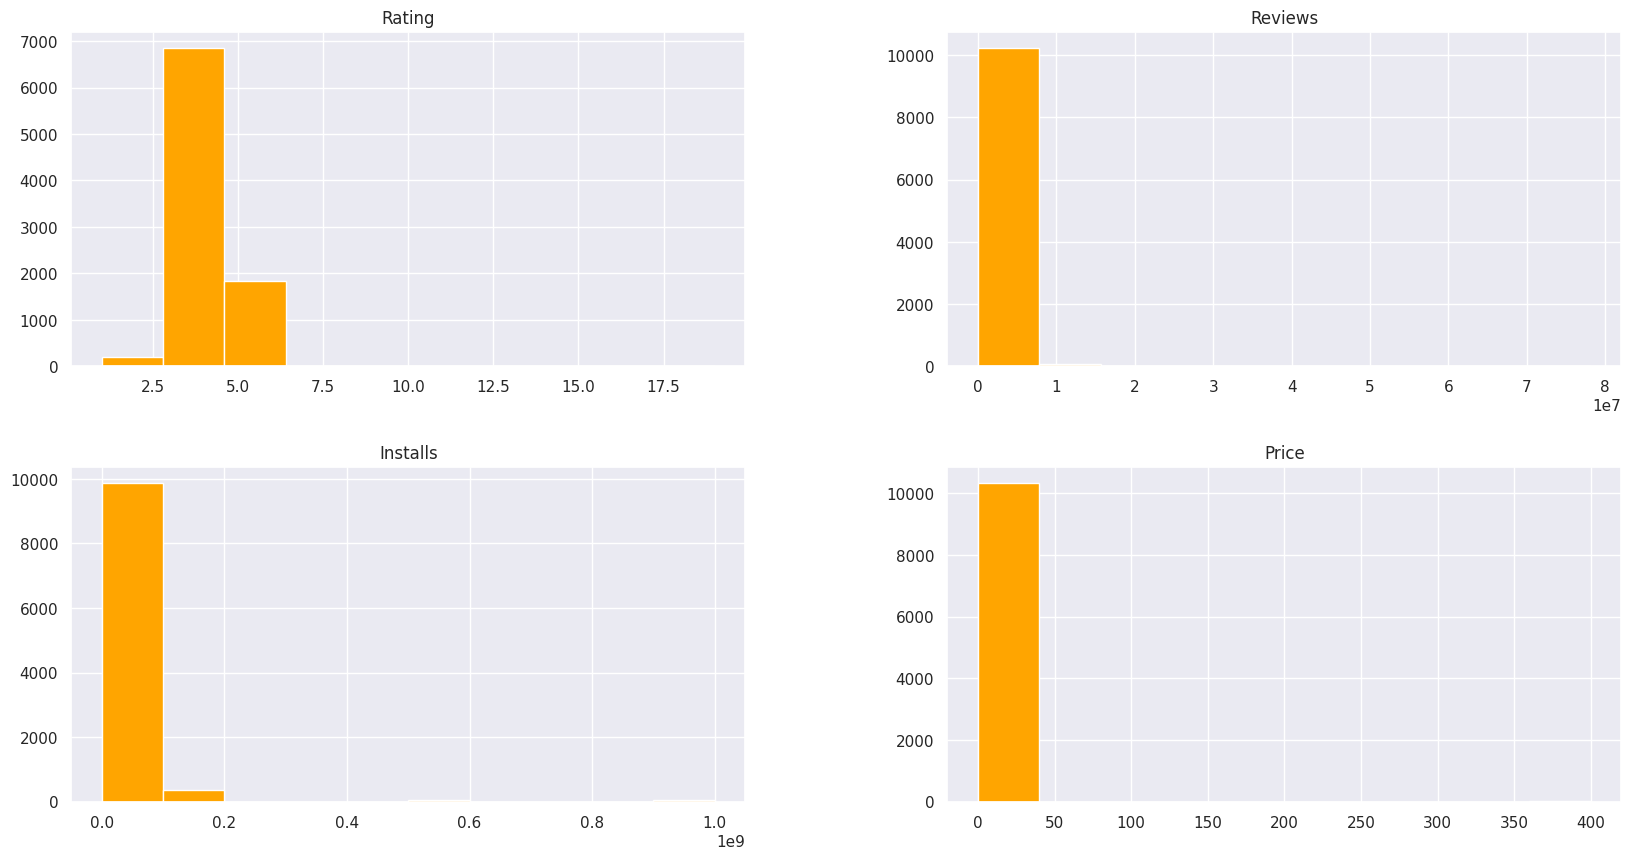

In [53]:
googleplaystore.hist(color="orange", figsize=(20, 10))  # Plotted Histogram

In [54]:
df = h2o.H2OFrame(
    googleplaystore
)  # Converted Pandas Dataframe to H2O dataframe to proceed with AutoML

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [55]:
df.types  # Datatype of all attributes

{'App': 'enum',
 'Category': 'enum',
 'Rating': 'real',
 'Reviews': 'int',
 'Size': 'enum',
 'Installs': 'int',
 'Type': 'enum',
 'Price': 'real',
 'Content_Rating': 'enum',
 'Genres': 'enum'}

In [56]:
pct_rows = 0.80  # Setting up the data split between training and test dataset.
df_train, df_test = df.split_frame([pct_rows])

In [57]:
print(df_train.shape)
print(df_test.shape)

(8242, 10)
(2116, 10)


In [58]:
df_train.head()

App,Category,Rating,Reviews,Size,Installs,Type,Price,Content_Rating,Genres
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0,Age_0+,Art & Design;Pretend Play
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,5e+07,Free,0,Age_13+,Art & Design
Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0,Age_0+,Art & Design
Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,1e+06,Free,0,Age_0+,Art & Design
Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,1e+06,Free,0,Age_0+,Art & Design
Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28M,1e+06,Free,0,Age_0+,Art & Design
Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788,12M,1e+06,Free,0,Age_0+,Art & Design
Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,1e+07,Free,0,Age_13+,Art & Design
Mandala Coloring Book,ART_AND_DESIGN,4.6,4326,21M,100000,Free,0,Age_0+,Art & Design
3D Color Pixel by Number - Sandbox Art Coloring,ART_AND_DESIGN,4.4,1518,37M,100000,Free,0,Age_0+,Art & Design


In [59]:
X = df.columns
print(X)

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content_Rating', 'Genres']


In [60]:
# Set target and predictor variables
y = "Reviews"
X.remove(y)  # Removing the result frm our predictors data
X.remove("App")
X.remove("Genres")
X.remove("Size")  # Removing App,Genres,Size from the predictor's data, as it is not related
print(X)

['Category', 'Rating', 'Installs', 'Type', 'Price', 'Content_Rating']


In [61]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)  # Setting of AutoML

In [62]:
aml.train(x=X, y=y, training_frame=df_train)  # Trainig the dataset on different models

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20230329_231522_model_3


Model Summary: 
    number_of_trees
--  -----------------
    84

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 573955567952.3895
RMSE: 757598.5532934903
MAE: 136127.44525261084
RMSLE: NaN
Mean Residual Deviance: 573955567952.3895

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 1633092957146.0247
RMSE: 1277925.2549136137
MAE: 194060.07860747125
RMSLE: NaN
Mean Residual Deviance: 1633092957146.0247

Cross-Validation Metrics Summary: 
                        mean         sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  -----------  ------------  ------------  ------------  ------------  ------------
mae                     194062       16889.5      187815        186394        174992        218789        202318
mean_residual_deviance  1.63319e+12  7.22287e+11  9.35407e+11   1.50819e+12   9.74445e+11   2.21142e+12   2.5365e+12
mse                     1.63319e+12  7.22287e+11  9.35407e+11   1.50819e+12   9.74445e+11   2.21142e+12   2.5365e+12
r2                      0.716044     0.211665     0.917243      0.880843      0.796498      0.544948      0.440687
residual_deviance       1.63319e+12  7.22287e+11  9.35407e+11   1.50819e+12   9.74445e+11   2.21142e+12   2.5365e+12
rmse                    1.25242e+06  284233       967164        1.22808e+06   987140        1.48709e+06   1.59264e+06
rmsle                   nan          0            nan           nan           nan           nan           nan

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2023-03-29 23:17:31  31.290 sec  0                  2.7931e+06       412744          7.80143e+12
    2023-03-29 23:17:31  31.314 sec  5                  1.4564e+06       193220          2.12111e+12
    2023-03-29 23:17:31  31.335 sec  10                 1.23857e+06      187622          1.53406e+12
    2023-03-29 23:17:31  31.365 sec  15                 1.1199e+06       176892          1.25418e+12
    2023-03-29 23:17:31  31.394 sec  20                 1.02396e+06      170307          1.0485e+12
    2023-03-29 23:17:31  31.425 sec  25                 956602           163138          9.15088e+11
    2023-03-29 23:17:31  31.460 sec  30                 912841           157775          8.33279e+11
    2023-03-29 23:17:31  31.501 sec  35                 882961           154403          7.7962e+11
    2023-03-29 23:17:31  31.548 sec  40                 847231           150534          7.178e+11
    2023-03-29 23:17:31  31.611 sec  45                 832354           148151          6.92814e+11
    2023-03-29 23:17:31  31.672 sec  50                 820769           146515          6.73662e+11
    2023-03-29 23:17:32  31.735 sec  55                 807643           143817          6.52287e+11
    2023-03-29 23:17:32  31.808 sec  60                 799445           142997          6.39112e+11
    2023-03-29 23:17:32  31.883 sec  65                 785866           140840          6.17585e+11
    2023-03-29 23:17:32  31.968 sec  70                 776523           139170          6.02988e+11
    2023-03-29 23:17:32  32.053 sec  75                 767658           138130          5.89299e+11
    2023-03-29 23:17:32  32.140 sec  80                 762694           137199          5.81701e+11
    2023-03-29 23:17:32  32.217 sec  84                 757599           136127          5.73956e+11

Variable Importances: 
variable                      relative_importance     scaled_importance       percentage
----------------------------  ----------------------  ----------------------  ----------------------
Installs                      6.101695110683034e+16   1.0                     0.5363

In [63]:
print(
    aml.leaderboard
)  # Leaderboard showing the performance of different models on the dataset.

model_id                                                        rmse          mse     mae    rmsle    mean_residual_deviance
XGBoost_grid_1_AutoML_1_20230329_231522_model_3          1.27793e+06  1.63309e+12  194060      nan               1.63309e+12
GBM_grid_1_AutoML_1_20230329_231522_model_2              1.29233e+06  1.67012e+12  205636      nan               1.67012e+12
StackedEnsemble_BestOfFamily_4_AutoML_1_20230329_231522  1.29967e+06  1.68915e+12  198400      nan               1.68915e+12
GBM_5_AutoML_1_20230329_231522                           1.3153e+06   1.73002e+12  217396      nan               1.73002e+12
StackedEnsemble_AllModels_3_AutoML_1_20230329_231522     1.33292e+06  1.77668e+12  207178      nan               1.77668e+12
XGBoost_grid_1_AutoML_1_20230329_231522_model_2          1.33821e+06  1.79082e+12  210350      nan               1.79082e+12
StackedEnsemble_BestOfFamily_3_AutoML_1_20230329_231522  1.34006e+06  1.79575e+12  221167      nan               1.79575e+12


The models listed in the leaderboard are ranked based on their rmse score, where a lower score indicates better performance. The top row in the leaderboard represents the best-performing model with the lowest rmse score. The evaluation metrics can be used to compare the performance of different models and help in selecting the best model for the particular use case.

In this leaderboard, the top 3 best performing models are

1. StackedEnsemble_BestOfFamily_4_AutoML_1_20230216_165301 its rmse is 1.58922e+06  
2. XGBoost_grid_1_AutoML_1_20230216_165301_model_4  its rmse is 1.59273e+06  
3. GBM_2_AutoML_1_20230216_165301  its rmse is  1.59524e+06 

In [64]:
model_index = 0
glm_index = 0
glm_model = ""
aml_leaderboard_df = aml.leaderboard.as_data_frame()
models_dict = {}
for m in aml_leaderboard_df["model_id"]:
    models_dict[m] = model_index
    if "StackedEnsemble" not in m:
        break
    model_index = model_index + 1

for m in aml_leaderboard_df["model_id"]:
    if "GLM" in m:
        models_dict[m] = glm_index
        break
    glm_index = glm_index + 1
models_dict

{'XGBoost_grid_1_AutoML_1_20230329_231522_model_3': 0,
 'GLM_1_AutoML_1_20230329_231522': 38}

In [65]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index, "model_id"])

0


In [66]:
best_model.algo

'xgboost'

In [67]:
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
import matplotlib.cbook

warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

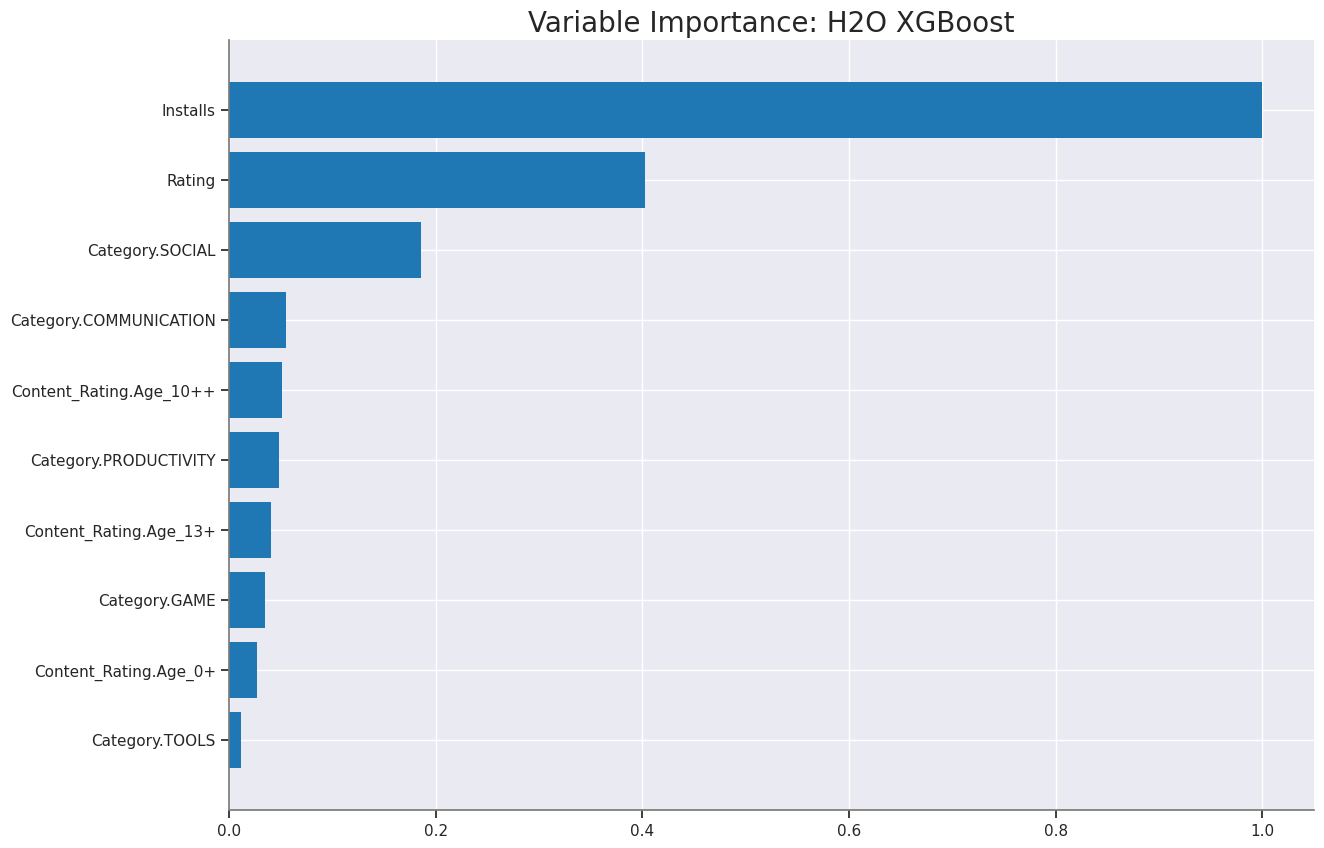

<Figure size 1600x800 with 0 Axes>

In [68]:
if best_model.algo in [
    "gbm",
    "drf",
    "xrt",
    "xgboost",
]:  # Importance of all the variables in GBM algorithm.
    best_model.varimp_plot()

38
glm


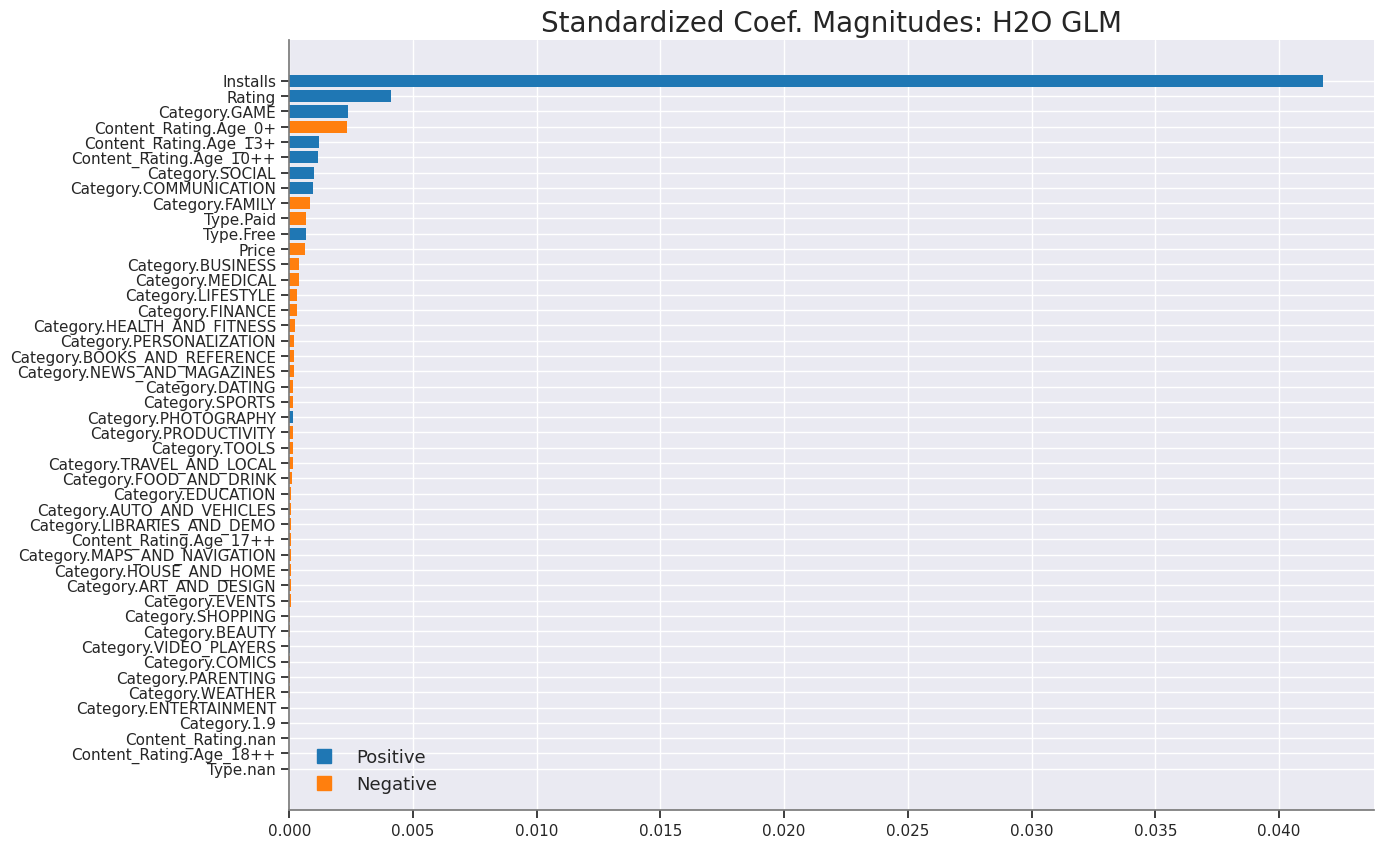

In [69]:
if glm_index is not 0:
    print(glm_index)
    glm_model = h2o.get_model(aml.leaderboard[glm_index, "model_id"])
    print(glm_model.algo)
    glm_model.std_coef_plot()

In [70]:
print(best_model.rmse(train=True))

757598.5532934903


In [71]:
def model_performance_stats(perf):
    d = {}
    try:
        d["mse"] = perf.mse()
    except:
        pass
    try:
        d["rmse"] = perf.rmse()
    except:
        pass
    try:
        d["null_degrees_of_freedom"] = perf.null_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_degrees_of_freedom"] = perf.residual_degrees_of_freedom()
    except:
        pass
    try:
        d["residual_deviance"] = perf.residual_deviance()
    except:
        pass
    try:
        d["null_deviance"] = perf.null_deviance()
    except:
        pass
    try:
        d["aic"] = perf.aic()
    except:
        pass
    try:
        d["logloss"] = perf.logloss()
    except:
        pass
    try:
        d["auc"] = perf.auc()
    except:
        pass
    try:
        d["gini"] = perf.gini()
    except:
        pass
    return d

In [72]:
mod_perf = best_model.model_performance(df_test)
stats_test = {}
stats_test = model_performance_stats(mod_perf)
stats_test

{'mse': 1790439281080.0625,
 'rmse': 1338072.973002617,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [73]:
predictions = best_model.predict(df_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [74]:
y_pred = h2o.as_list(
    predictions
)  # Predictions on Test Dataset using the best model from the leaderboard.
print(y_pred)

            predict
0     -10953.920898
1     180898.890625
2      -9928.791016
3     -10176.075195
4      -7609.042969
...             ...
2111    3520.841553
2112    6483.571777
2113   -5494.564941
2114     -98.416107
2115  -52723.390625

[2116 rows x 1 columns]


In [75]:
y_test = h2o.as_list(df_test[y])  # Real Answers
y_test

,Reviews
0,159
1,87510
2,967
3,178
4,121
...,...
2111,0
2112,7
2113,881
2114,7


In [76]:
print(X)

['Category', 'Rating', 'Installs', 'Type', 'Price', 'Content_Rating']


In this Section, we will be using the GLM model to check if regularization is helping us to improve the accuracy and reduce overfitting. 

In [77]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

googleplaystore_glm = H2OGeneralizedLinearEstimator(
    family="gaussian", lambda_=0, compute_p_values=True, nfolds=5, remove_collinear_columns = True
)  # Elastic Net Regularization
googleplaystore_glm_regularization_ridge = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=0, nfolds=5, remove_collinear_columns = True
)  # RIDGE Regularization
googleplaystore_glm_regularization_lasso = H2OGeneralizedLinearEstimator(
    family="gaussian", alpha=1, nfolds=5, remove_collinear_columns = True
)  # LASSO Regularization
googleplaystore_glm_regularization_lamba_search = H2OGeneralizedLinearEstimator(
    lambda_search=True, remove_collinear_columns = True
)  # Lambda Search

In [78]:
googleplaystore_glm.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,None,43,41,1,py_2_sid_bcb1
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,451533.66,49528.652,443283.88,407106.2,469894.53,410191.6,527192.1
mean_residual_deviance,4567554100000.0000000,2205642920000.0000000,4101780540000.0000000,2624986020000.0000000,6340677700000.0000000,2423130420000.0000000,7347195300000.0000000
mse,4567554100000.0000000,2205642920000.0000000,4101780540000.0000000,2624986020000.0000000,6340677700000.0000000,2423130420000.0000000,7347195300000.0000000
null_deviance,12583141800000000.0000000,6549703800000000.0000000,11099202700000000.0000000,9181062800000000.0000000,19927145000000000.0000000,4252634220000000.0000000,18455665600000000.0000000
r2,0.3559101,0.1999308,0.4061225,0.5235867,0.4895768,0.0226678,0.3375968
residual_deviance,7494774300000000.0000000,3582678910000000.0000000,6591561500000000.0000000,4373226700000000.0000000,10164106700000000.0000000,4126591160000000.0000000,12218385200000000.0000000
rmse,2086149.6,519054.06,2025285.2,1620180.9,2518070.2,1556640.8,2710571.0
rmsle,nan,0.0,nan,nan,nan,nan,nan


# Ridge Regularization

In [79]:
googleplaystore_glm_regularization_ridge.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Ridge ( lambda = 1765.9 ),46,41,1,py_2_sid_bcb1
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,453251.5,24559.047,476414.1,449973.88,412773.06,466267.62,460828.84
mean_residual_deviance,4641198700000.0000000,1444062170000.0000000,6481170700000.0000000,4299538560000.0000000,2907386680000.0000000,5709001900000.0000000,3808897010000.0000000
mse,4641198700000.0000000,1444062170000.0000000,6481170700000.0000000,4299538560000.0000000,2907386680000.0000000,5709001900000.0000000,3808897010000.0000000
null_deviance,12581364700000000.0000000,6841864600000000.0000000,20259188900000000.0000000,12924745200000000.0000000,5321347400000000.0000000,18331839500000000.0000000,6069703100000000.0000000
r2,0.2954503,0.2420925,0.464535,0.4377929,0.1136313,0.4990925,-0.0378001
residual_deviance,7657730200000000.0000000,2407675990000000.0000000,10842998200000000.0000000,7266220300000000.0000000,4707059200000000.0000000,9180074900000000.0000000,6292297800000000.0000000
rmse,2133089.0,337510.38,2545814.2,2073532.9,1705106.0,2389351.8,1951639.6
rmsle,nan,0.0,nan,nan,nan,nan,nan


# Lasso Regularization

In [80]:
googleplaystore_glm_regularization_lasso.train(x=X, y=y, training_frame=df_train)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,Lasso (lambda = 1765.9 ),46,26,1,py_2_sid_bcb1
,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,449039.78,44805.098,416254.5,520633.88,444557.97,407176.7,456575.9
mean_residual_deviance,4543220300000.0000000,1870082870000.0000000,4611201000000.0000000,7104913500000.0000000,4798927100000.0000000,1836834750000.0000000,4364226270000.0000000
mse,4543220300000.0000000,1870082870000.0000000,4611201000000.0000000,7104913500000.0000000,4798927100000.0000000,1836834750000.0000000,4364226270000.0000000
null_deviance,12582698300000000.0000000,6277300900000000.0000000,13176877000000000.0000000,20131108700000000.0000000,11358153800000000.0000000,3005780250000000.0000000,15241570800000000.0000000
r2,0.3301617,0.2153565,0.4326934,0.4219332,0.2926239,-0.0247009,0.5282587
residual_deviance,7475782500000000.0000000,3049187600000000.0000000,7474757100000000.0000000,11630743500000000.0000000,8033403500000000.0000000,3056493080000000.0000000,7183516400000000.0000000
rmse,2089578.5,470215.9,2147370.8,2665504.2,2190645.2,1355298.8,2089073.0
rmsle,nan,0.0,nan,nan,nan,nan,nan


## Does regularization help?

Upon applying the ridge regularization, a marginal enhancement in the evaluation metrics of the cross-validation data is noticeable (r2 mean increased from 0.4003762 to 0.4227884). This implies that ridge regularization aids in preventing the overfitting of the model and results in a better performance of metrics on the validation dataset.

In [81]:
lambda_search = googleplaystore_glm_regularization_lamba_search.train(
    x=X, y=y, training_frame=df_train
)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


In [82]:
lambda_search

Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1680131639023_27


GLM Model: summary
    family    link      regularization                                  lambda_search                                                                     number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------------------------  --------------------------------------------------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 3218000.0 )  nlambda = 100, lambda.max = 3531800.0, lambda.min = 3218000.0, lambda.1se = -1.0  46                            1                              2                       py_2_sid_bcb1

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 4512347655308.212
RMSE: 2124228.720102478
MAE: 372930.14824347844
RMSLE: 6.0423551415926875
Mean Residual Deviance: 4512347655308.212
R^2: 0.40868748746579875
Null degrees of freedom: 8241
Residual degrees of freedom: 8240
Null deviance: 6.28952856344354e+16
Residual deviance: 3.719076937505028e+16
AIC: 263549.8491688928

Scoring History: 
    timestamp            duration    iteration    lambda    predictors    deviance_train    alpha    iterations    training_rmse      training_deviance    training_mae        training_r2
--  -------------------  ----------  -----------  --------  ------------  ----------------  -------  ------------  -----------------  -------------------  ------------------  -------------------
    2023-03-29 23:19:14  0.000 sec   1            3.5e+06   1             7.63107e+12       0.5
    2023-03-29 23:19:14  0.001 sec   2            3.2e+06   2             4.51235e+12       0.5
    2023-03-29 23:19:14  0.003 sec   3            2.9e+06   2             4.51235e+12       0.5
    2023-03-29 23:19:14  0.013 sec   4            2.7e+06   2             4.51235e+12       0.5
    2023-03-29 23:19:14  0.014 sec   5            2.4e+06   2             4.51235e+12       0.5
    2023-03-29 23:19:14  0.015 sec   6            2.2e+06   2             4.51235e+12       0.5
    2023-03-29 23:19:14  0.017 sec   7            2e+06     2             4.51235e+12       0.5      7             2124228.720102478  4512347655308.212    372930.14824347844  0.40868748746579875

Variable Importances: 
variable                      relative_importance    scaled_importance    percentage
----------------------------  ---------------------  -------------------  ------------
Installs                      1766097.875            1.0                  1.0
Category.1.9                  0.0                    0.0                  0.0
Category.ART_AND_DESIGN       0.0                    0.0                  0.0
Category.AUTO_AND_VEHICLES    0.0                    0.0                  0.0
Category.BEAUTY               0.0                    0.0                  0.0
Category.BOOKS_AND_REFERENCE  0.0                    0.0                  0.0
Category.BUSINESS             0.0                    0.0                  0.0
Category.COMICS               0.0                    0.0                  0.0
Category.COMMUNICATION        0.0                    0.0                  0.0
Category.DATING               0.0                    0.0                  0.0
---                           ---                    ---                  ---
Content_Rating.Age_10++       0.0                    0.0                  0.0
Content_Rating.Age_13+        0.0                    0.0                  0.0
Content_Rating.Age_17++       0.0                    0.0                  0.0
Content_Rating.Age_18++       0.0                    0.0                  0.0
Content_Rating.nan            0.0                    0.0                  0.0
Type.Free                     0.0                    0.0                  0.

Here we can observe that regularization helps a bit in reducing the overfitting of our GLM model. 

In [83]:
coeff_table = googleplaystore_glm._model_json["output"]["coefficients_table"]

In [84]:
coeff_table.as_data_frame()  # Z-Value and P-Value showing the significance of each attributes.

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-209792.935045,2.296208e+06,-0.091365,9.272049e-01,8.043811e+05
1,Category.ART_AND_DESIGN,-556024.445349,2.238894e+06,-0.248348,8.038715e-01,-5.560244e+05
2,Category.AUTO_AND_VEHICLES,-504461.893680,2.236662e+06,-0.225542,8.215630e-01,-5.044619e+05
3,Category.BEAUTY,-539704.806467,2.245042e+06,-0.240399,8.100273e-01,-5.397048e+05
4,Category.BOOKS_AND_REFERENCE,-624378.474235,2.225844e+06,-0.280513,7.790909e-01,-6.243785e+05
5,Category.BUSINESS,-503305.301782,2.225963e+06,-0.226107,8.211240e-01,-5.033053e+05
6,Category.COMICS,-415985.086974,2.245319e+06,-0.185268,8.530237e-01,-4.159851e+05
7,Category.COMMUNICATION,-177335.433014,2.226739e+06,-0.079639,9.365263e-01,-1.773354e+05
8,Category.DATING,-330652.641329,2.235288e+06,-0.147924,8.824064e-01,-3.306526e+05
9,Category.EDUCATION,-486572.242427,2.228335e+06,-0.218357,8.271565e-01,-4.865722e+05


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo
GBM_grid_1_AutoML_1_20230329_231522_model_8,1.33752e+06,1.78895e+12,243123,nan,1.78895e+12,484,0.013242,GBM
XGBoost_grid_1_AutoML_1_20230329_231522_model_3,1.33807e+06,1.79044e+12,196715,nan,1.79044e+12,949,0.003929,XGBoost
StackedEnsemble_BestOfFamily_4_AutoML_1_20230329_231522,1.34323e+06,1.80427e+12,202244,nan,1.80427e+12,389,0.023944,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20230329_231522,1.3593e+06,1.84771e+12,210372,nan,1.84771e+12,853,0.09783,StackedEnsemble
GBM_grid_1_AutoML_1_20230329_231522_model_5,1.38397e+06,1.91538e+12,209728,nan,1.91538e+12,1749,0.043285,GBM
XGBoost_grid_1_AutoML_1_20230329_231522_model_2,1.38425e+06,1.91614e+12,208533,nan,1.91614e+12,1363,0.012967,XGBoost
StackedEnsemble_BestOfFamily_3_AutoML_1_20230329_231522,1.39296e+06,1.94034e+12,228152,nan,1.94034e+12,496,0.032991,StackedEnsemble
XRT_1_AutoML_1_20230329_231522,1.40214e+06,1.96601e+12,247657,5.45587,1.96601e+12,492,0.010253,DRF
StackedEnsemble_AllModels_2_AutoML_1_20230329_231522,1.40632e+06,1.97773e+12,235820,nan,1.97773e+12,590,0.048227,StackedEnsemble
XGBoost_grid_1_AutoML_1_20230329_231522_model_4,1.41859e+06,2.0124e+12,251363,nan,2.0124e+12,1319,0.011392,XGBoost


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

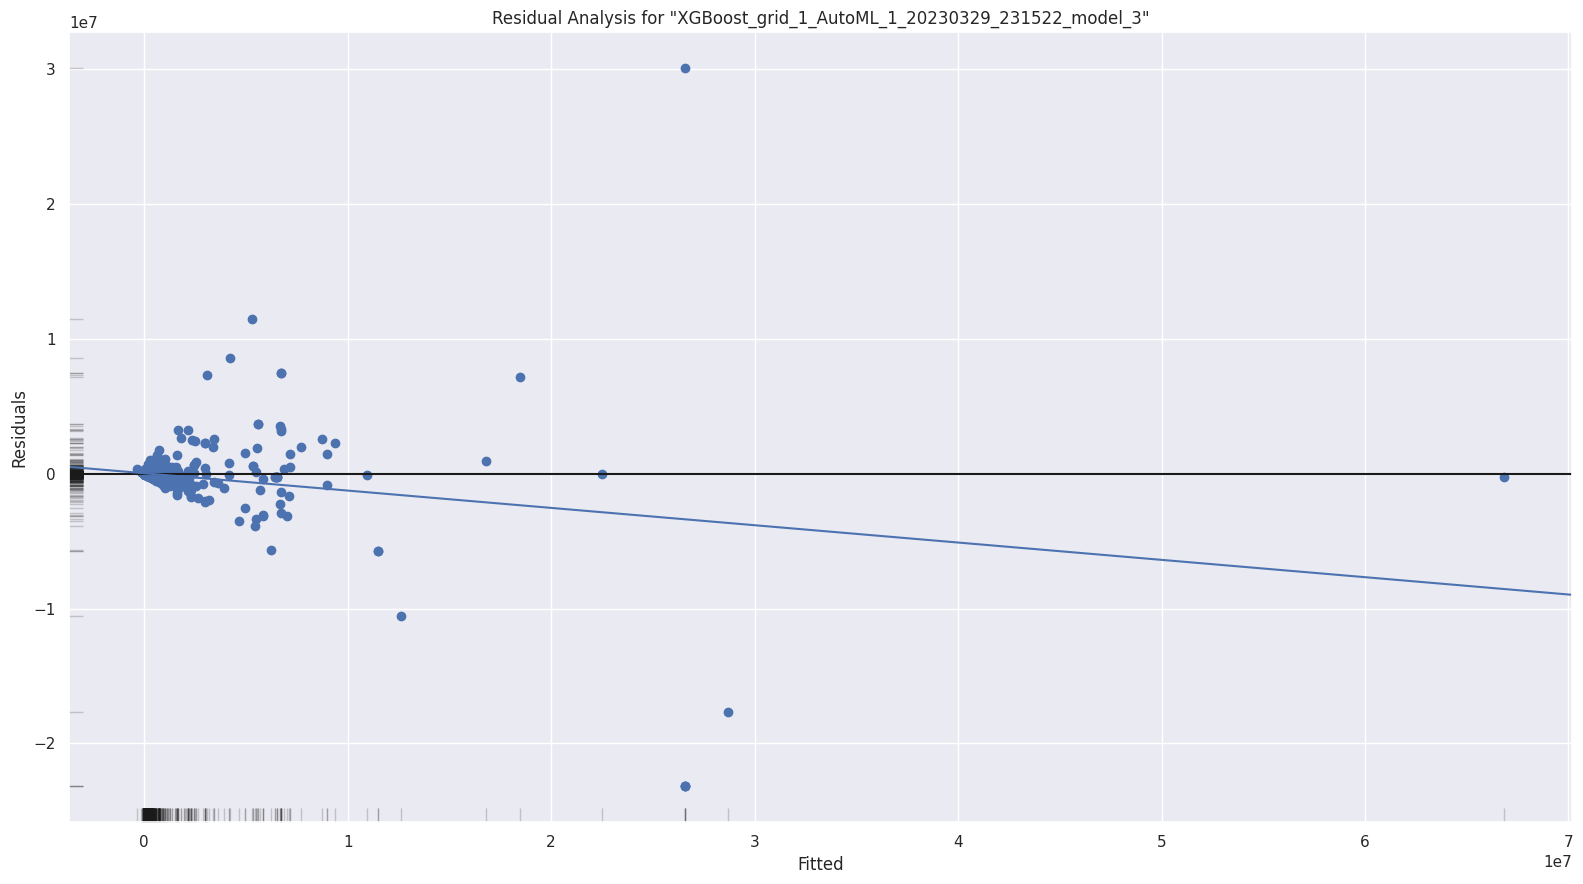

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

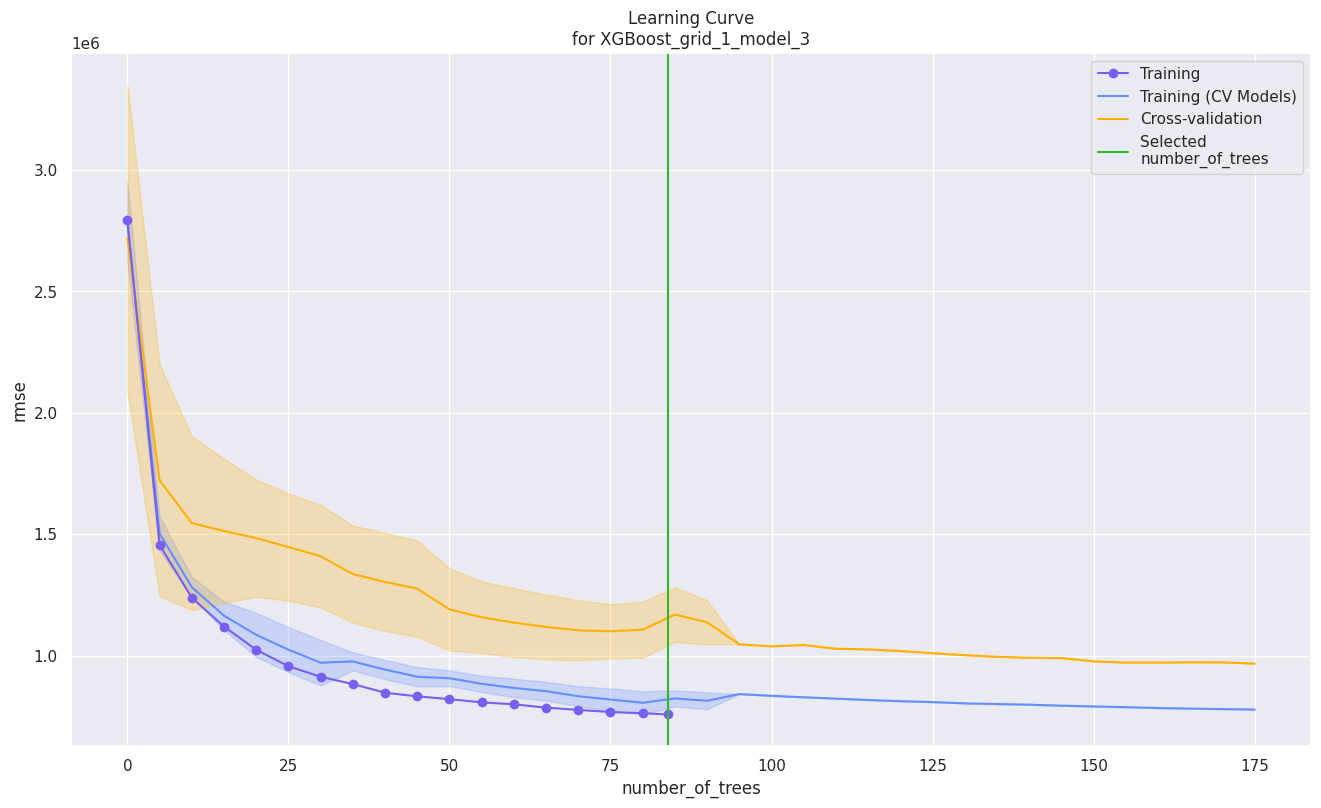

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

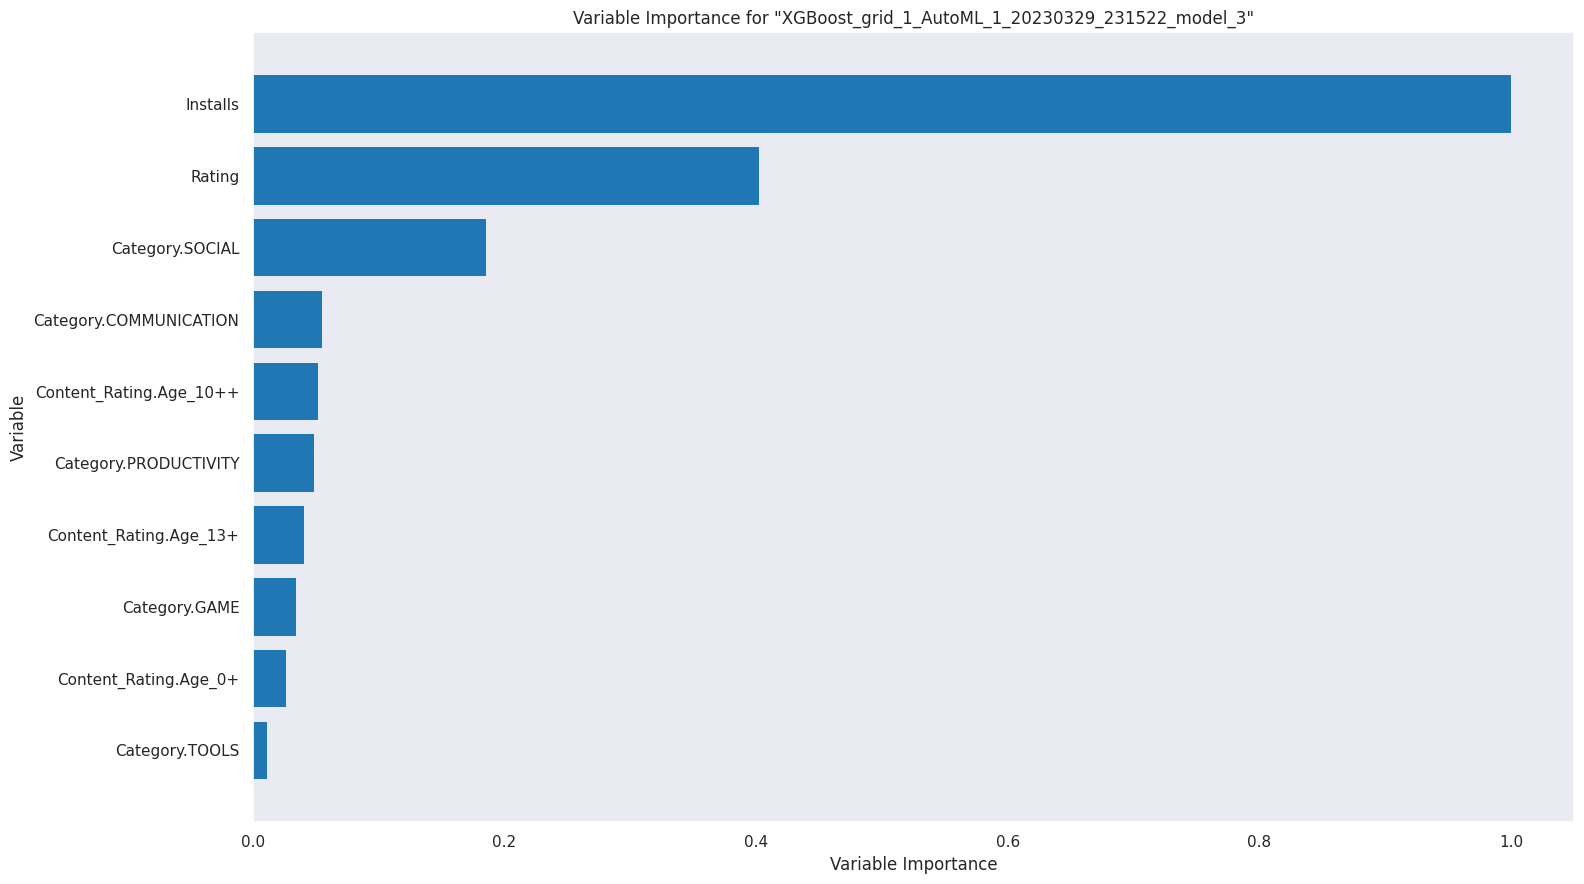

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

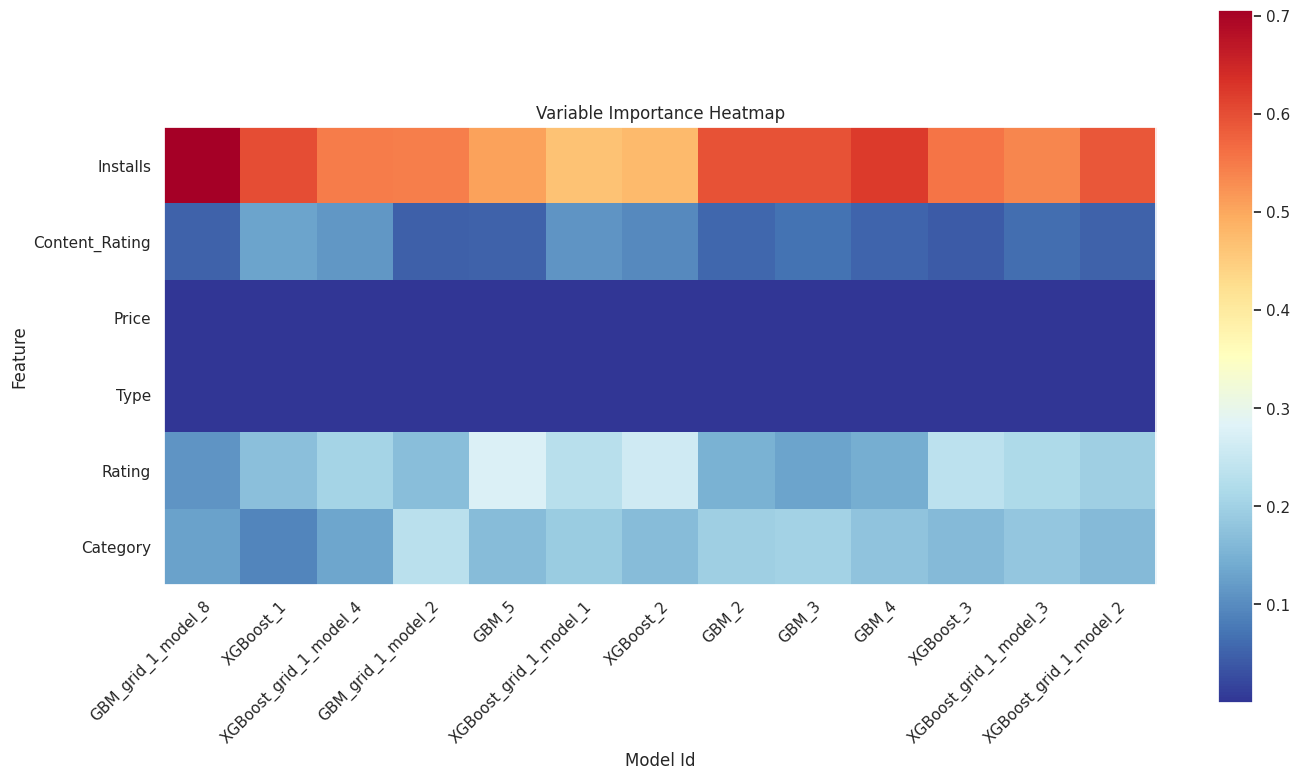

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

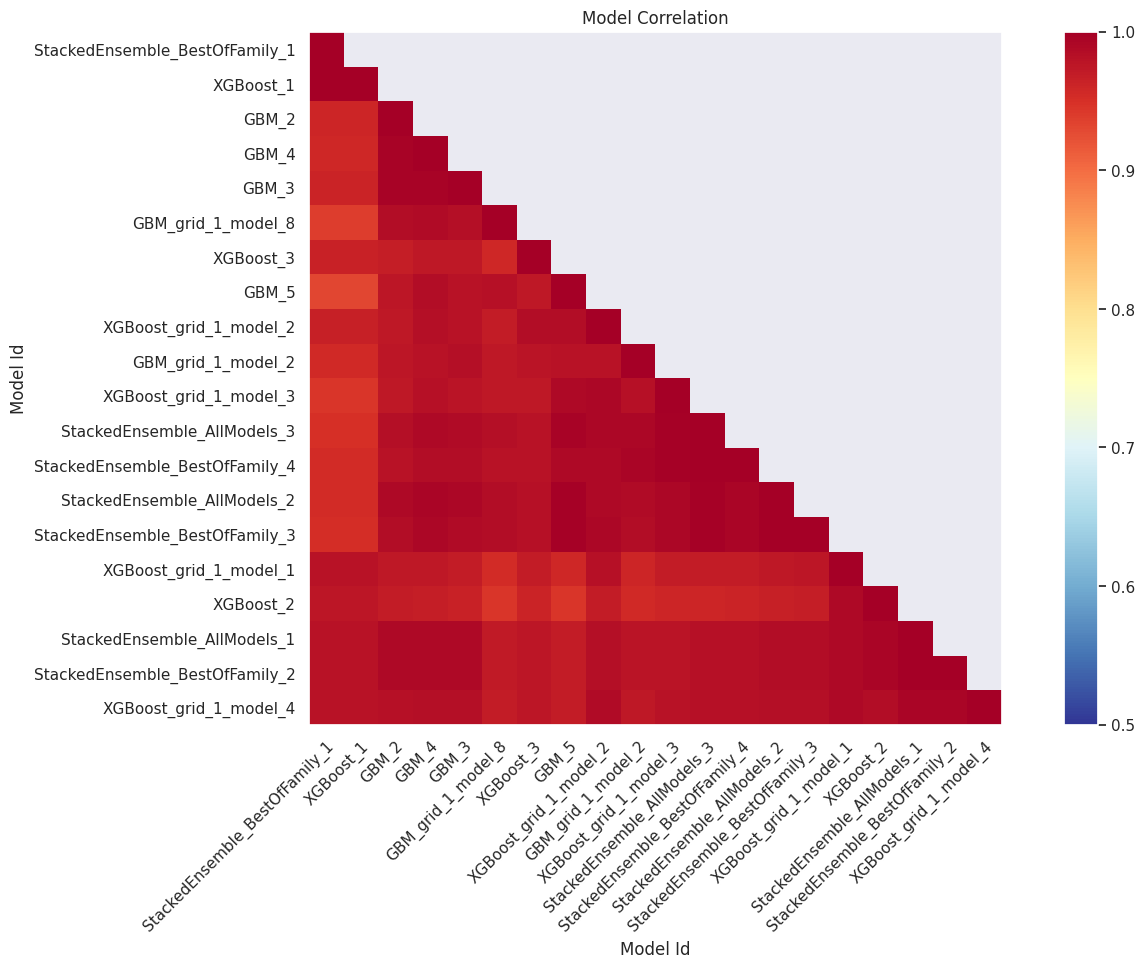

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

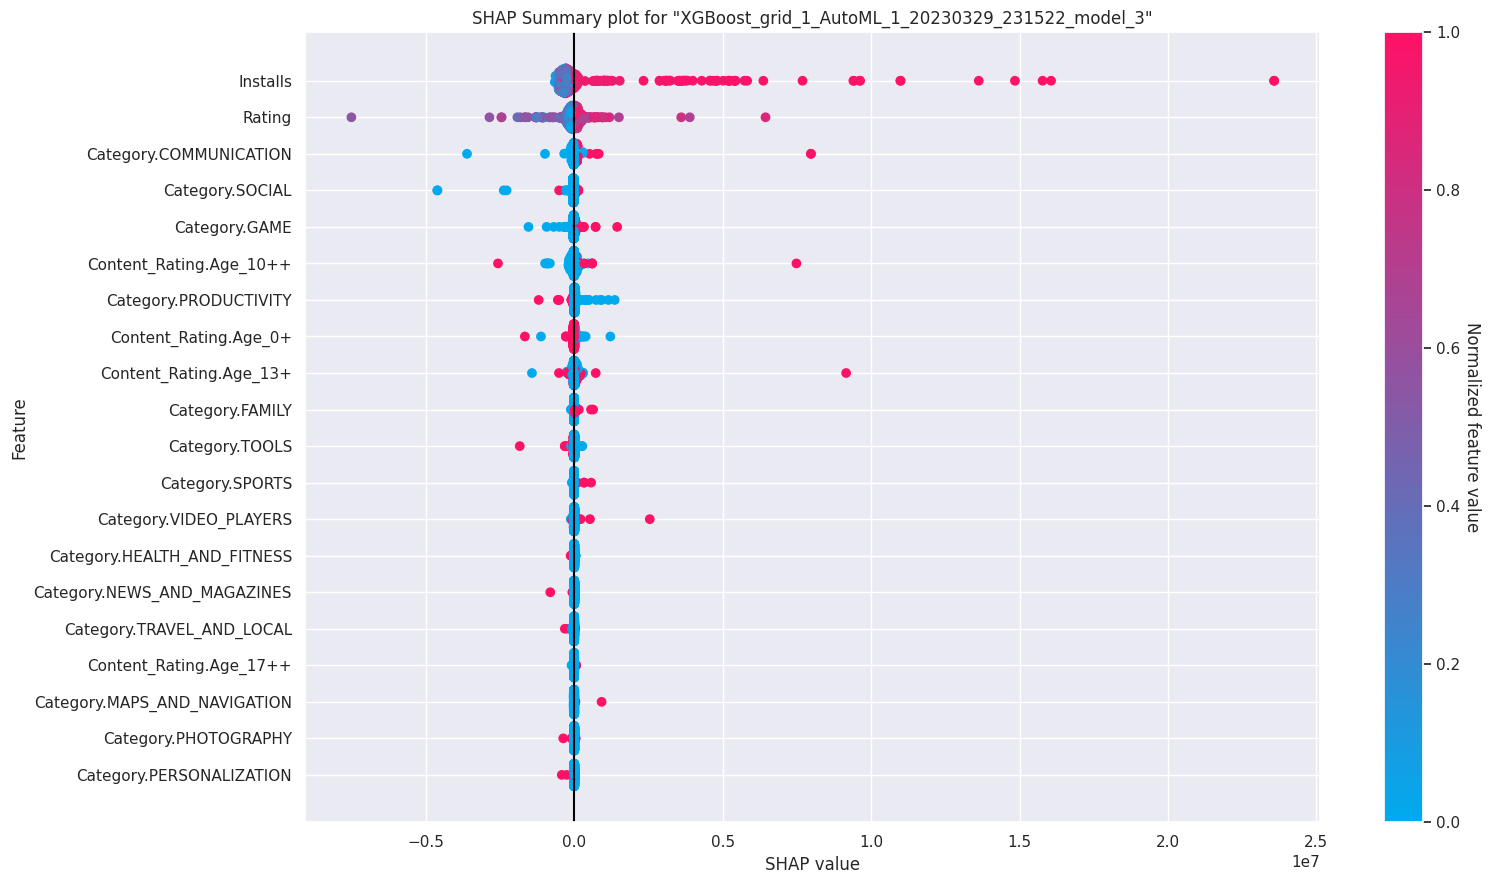

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

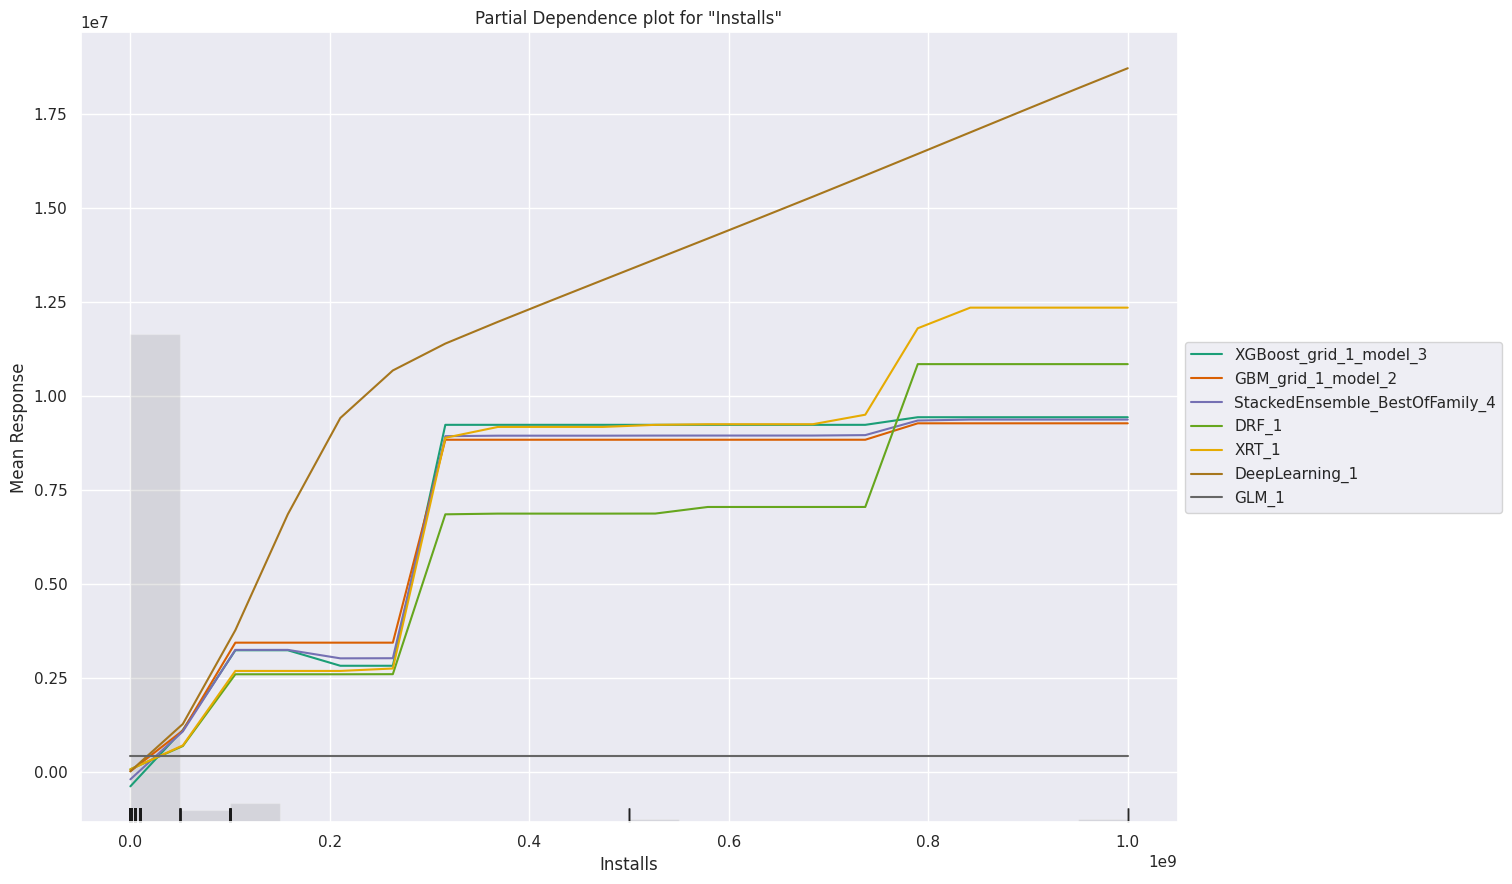

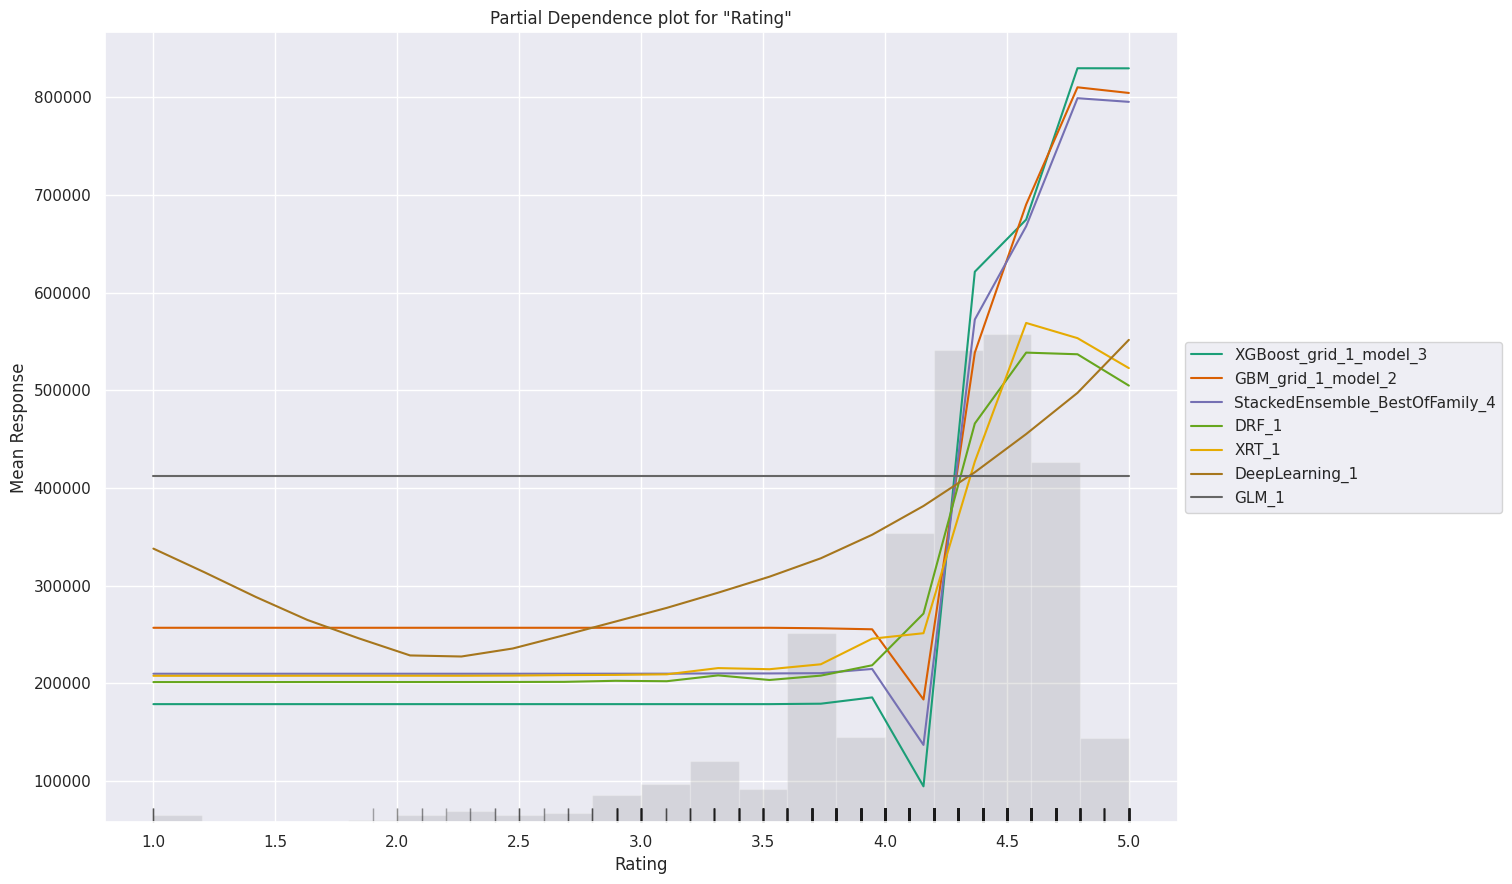

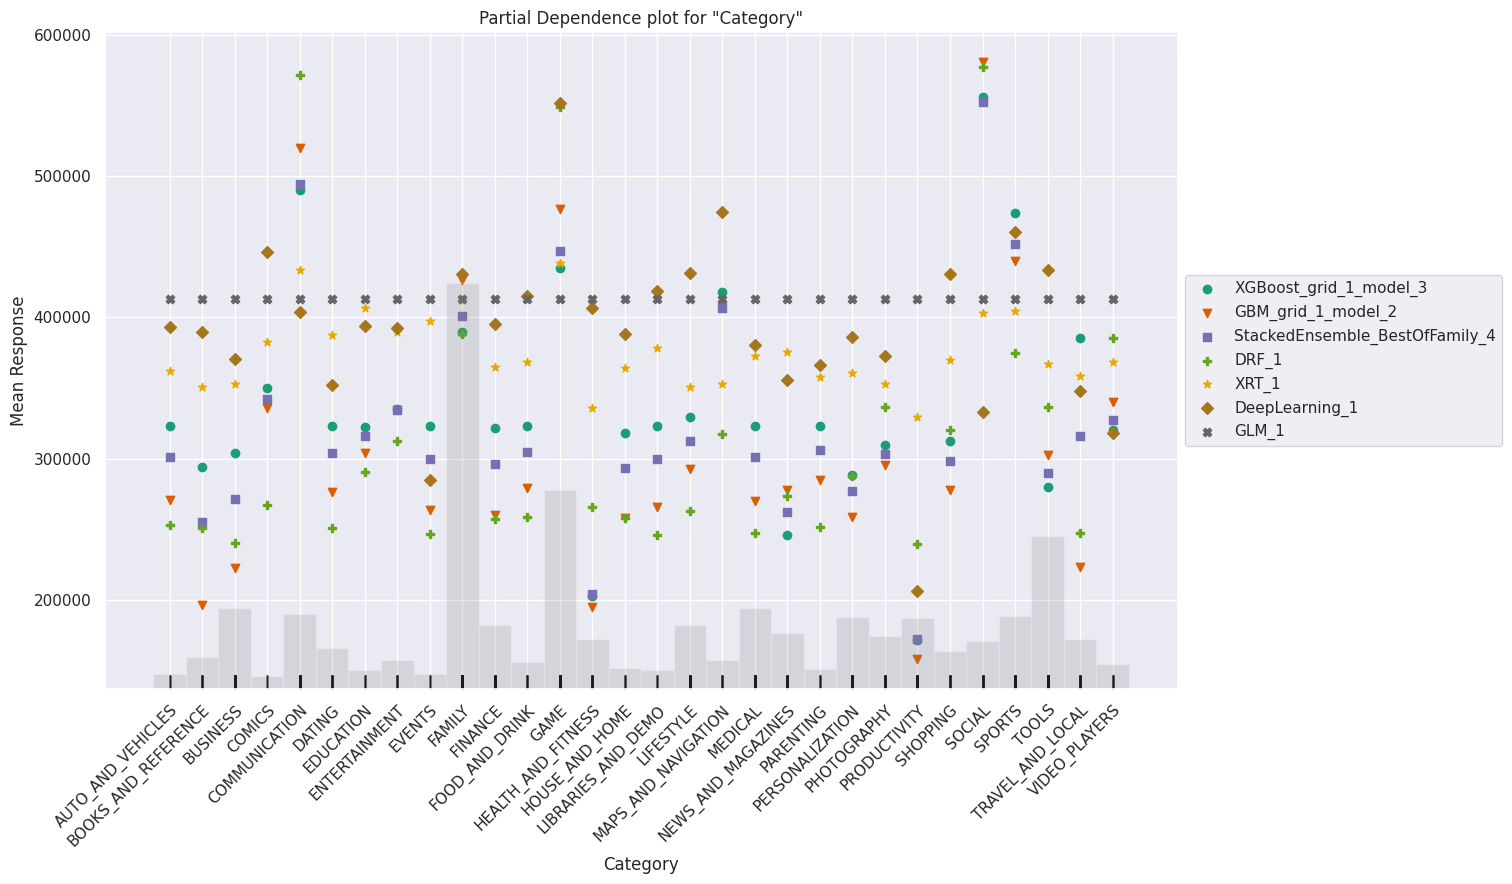

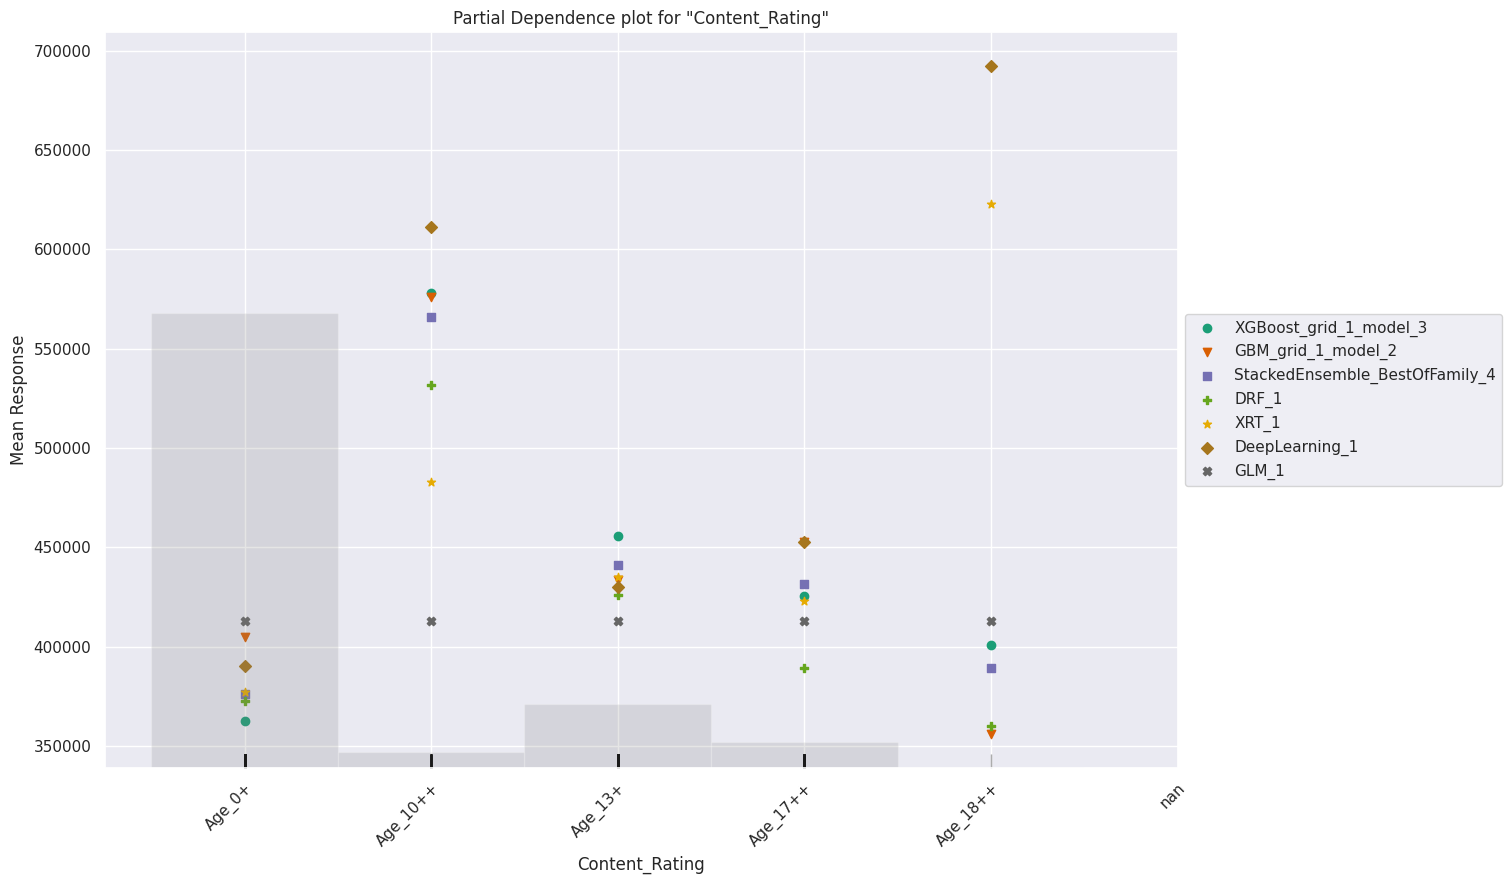

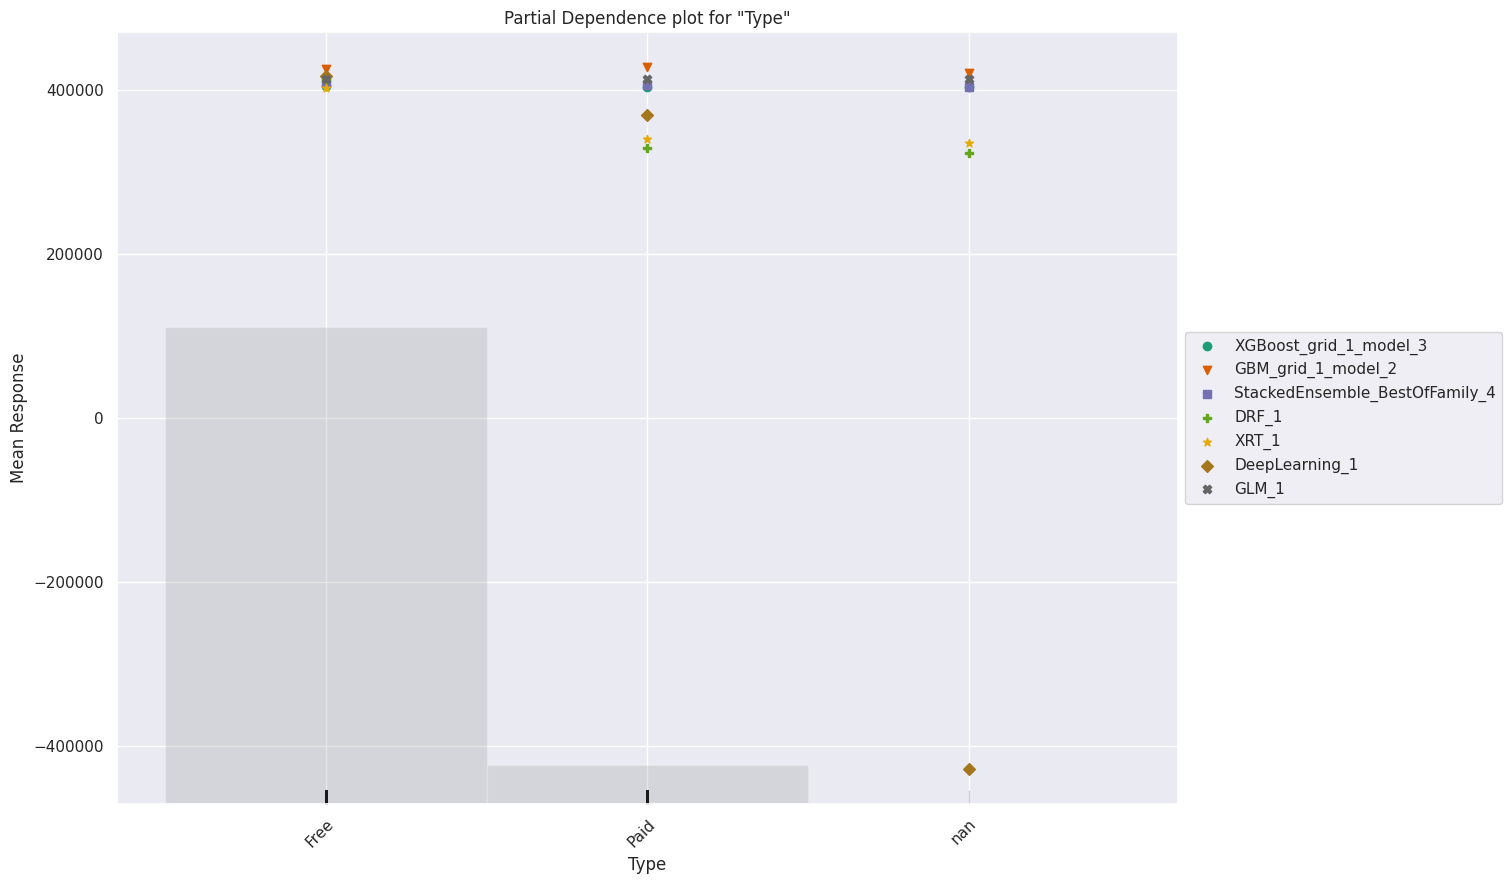

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

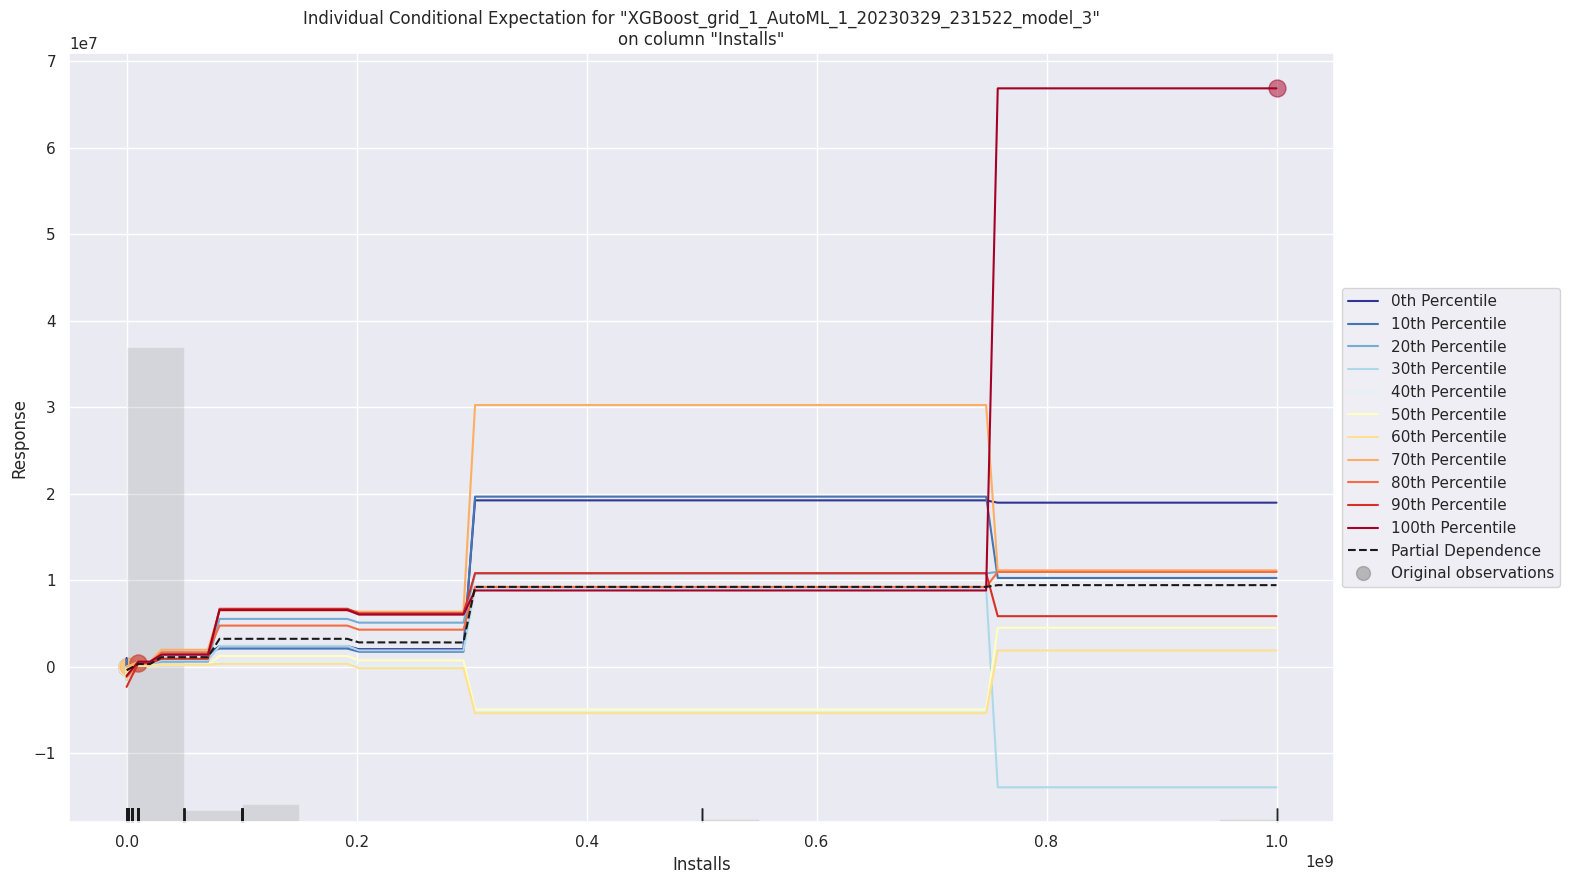

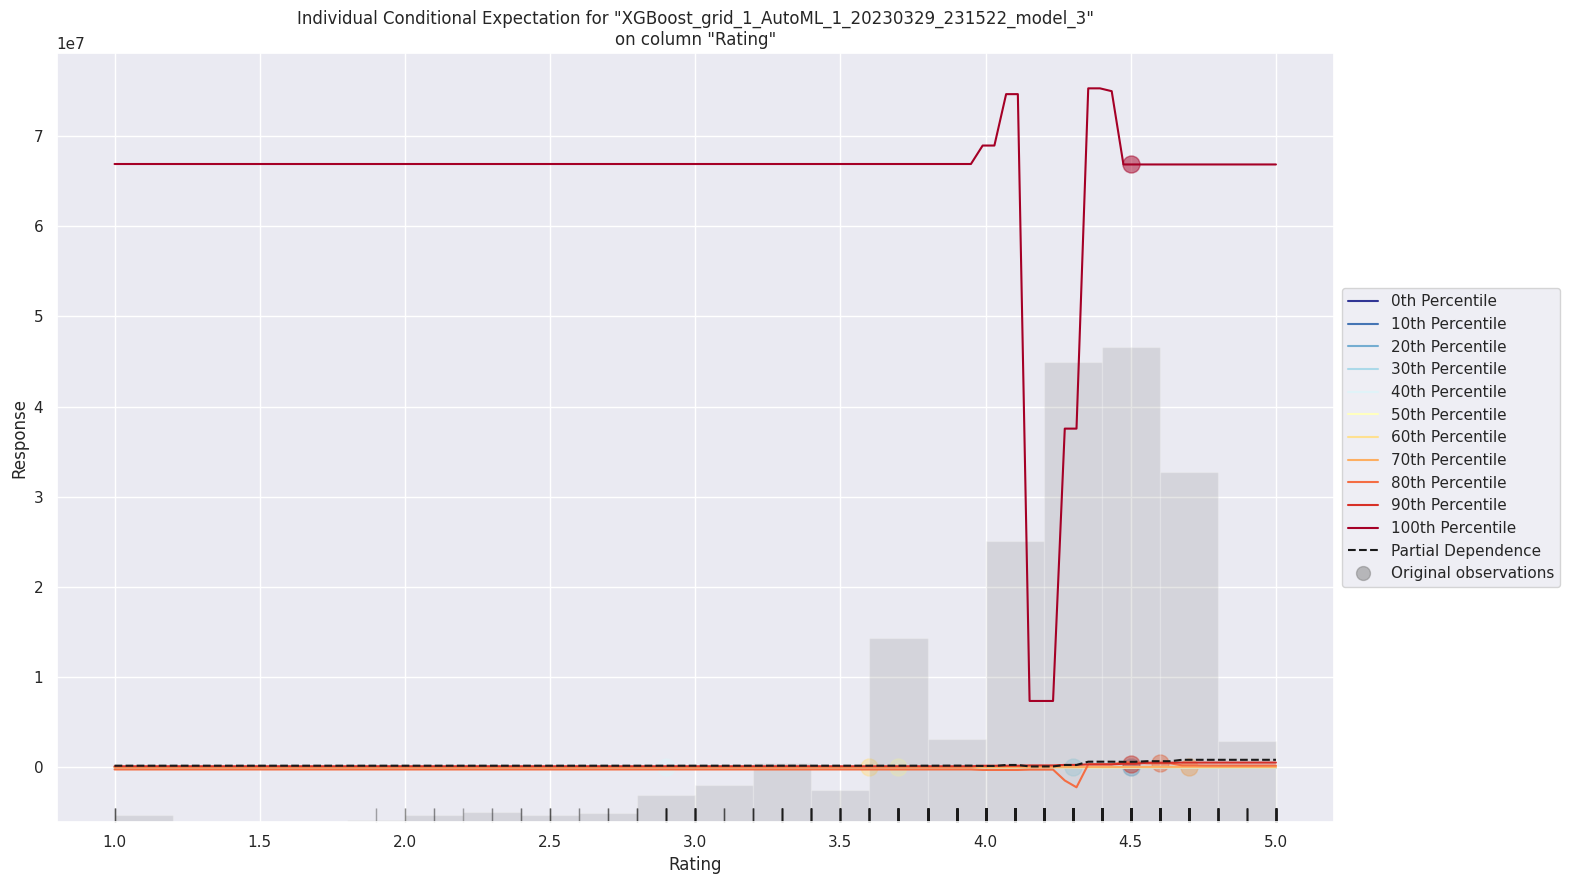

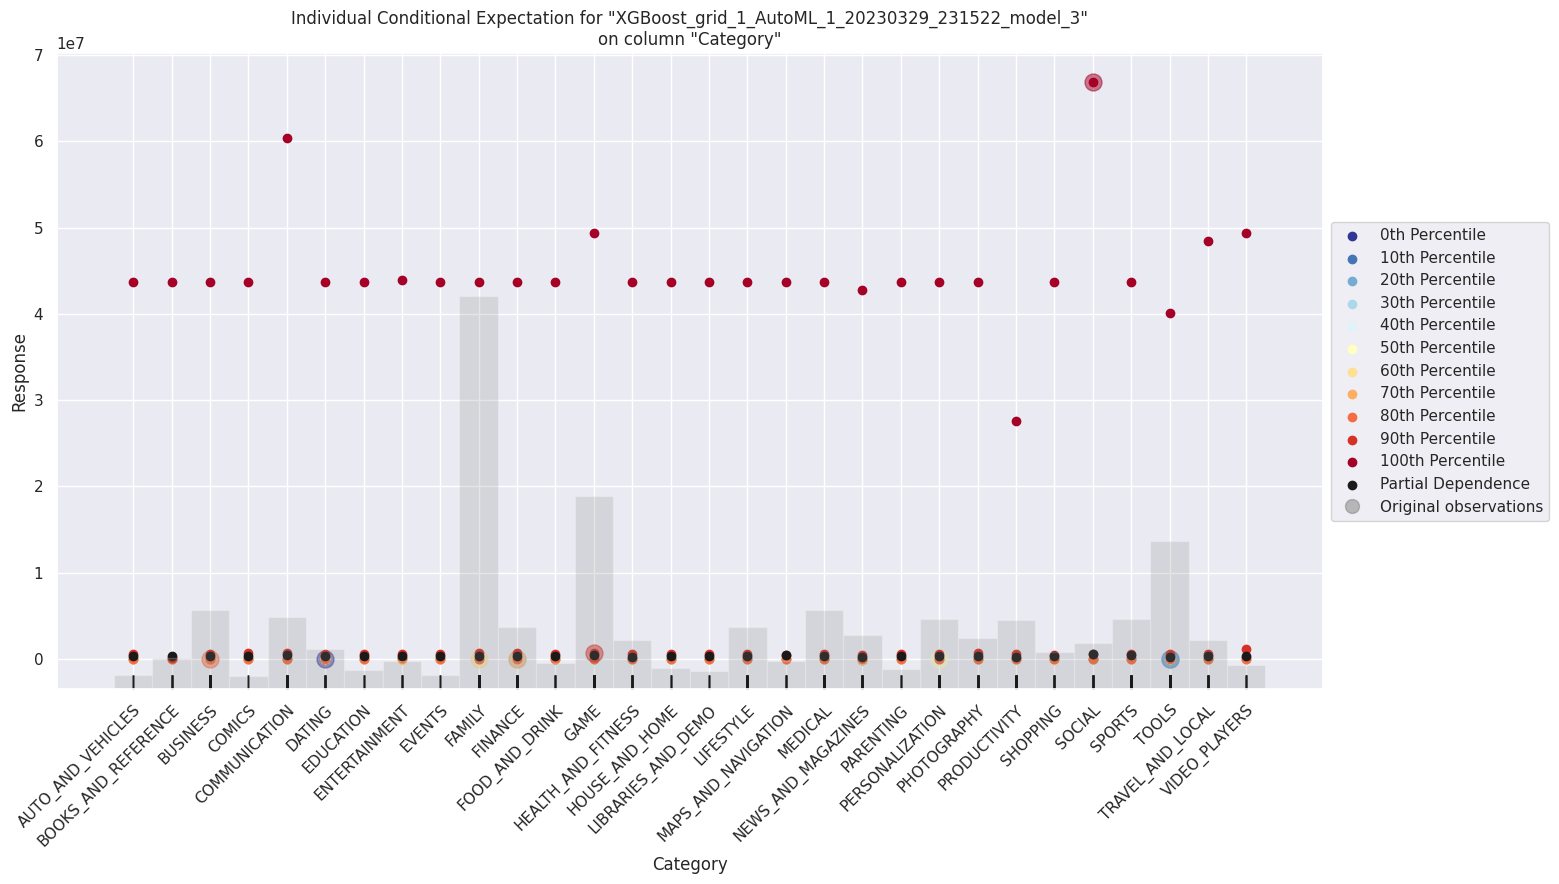

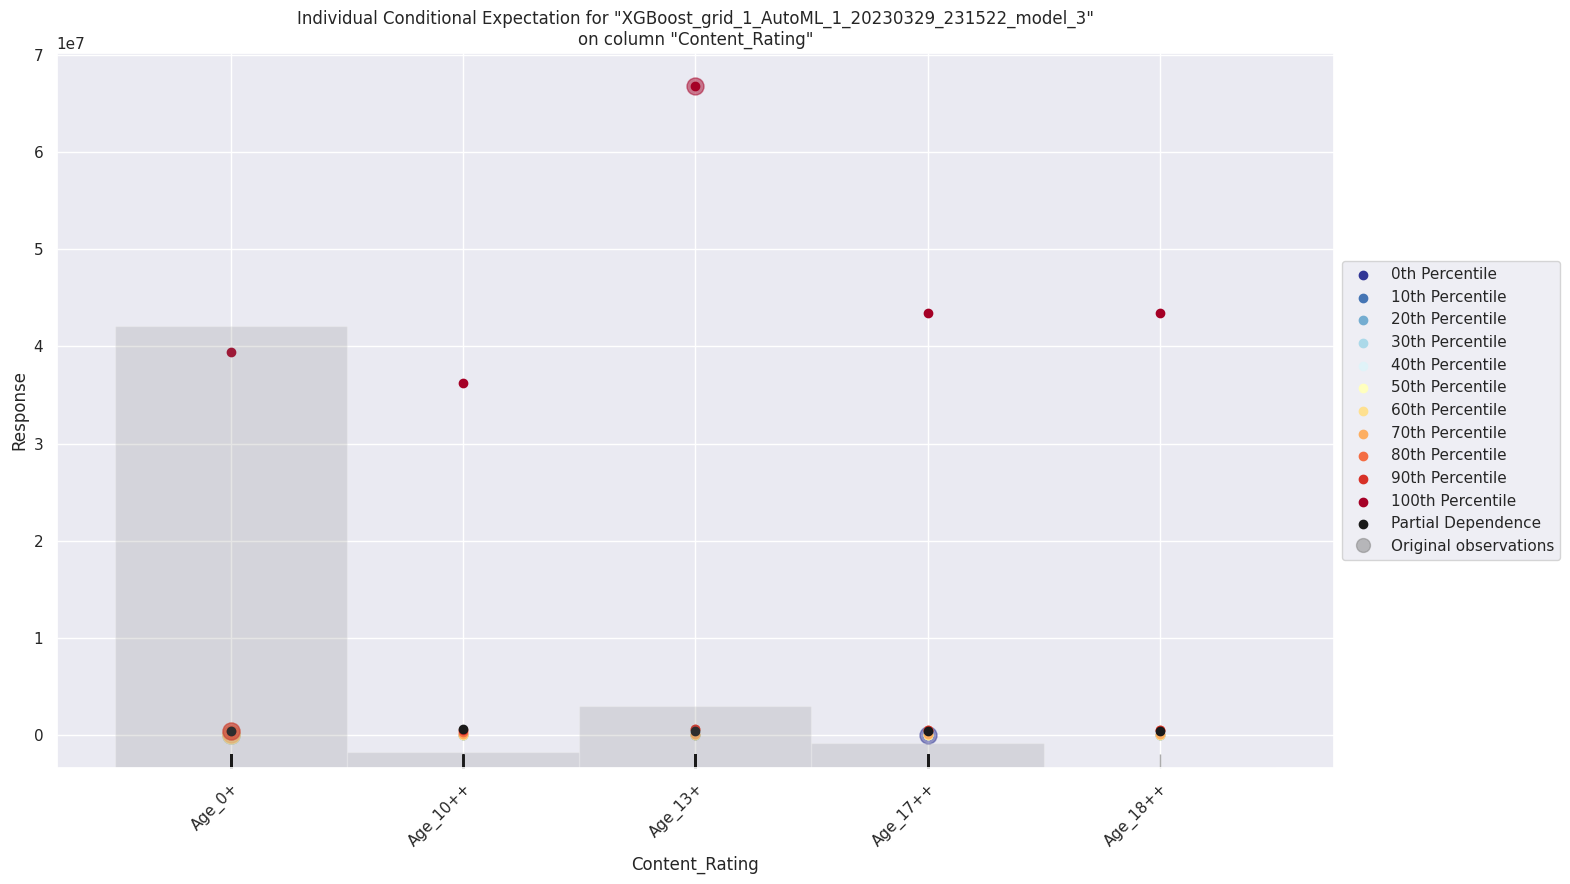

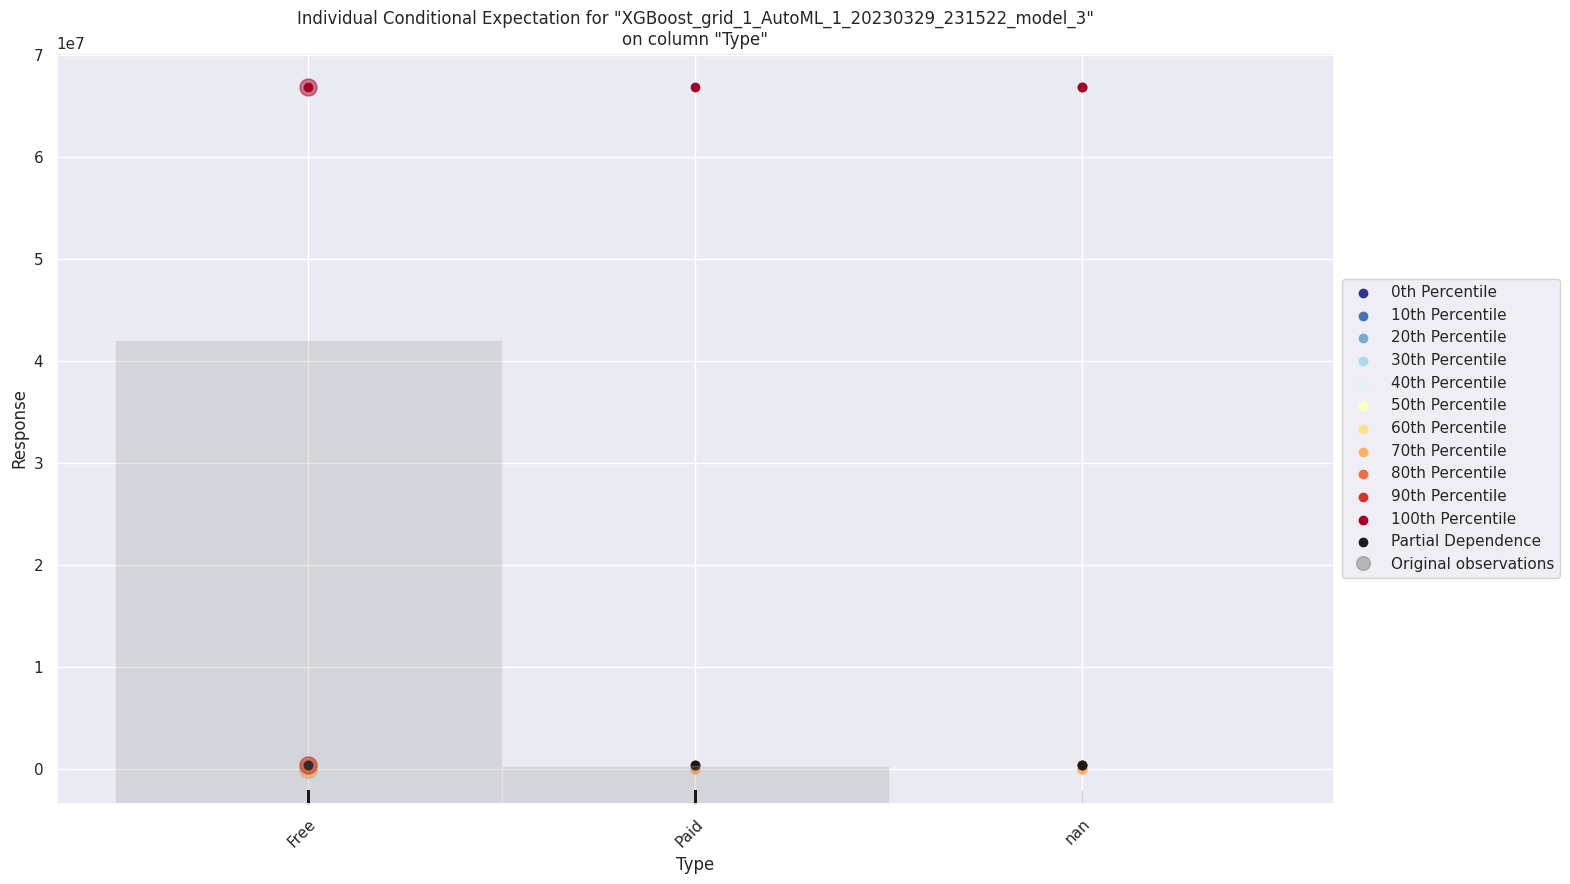

In [85]:
exa = aml.explain(df_test)

# Exicuting Hyperparameter Tuning - Random Grid Search on GBM Model

In [86]:
import statsmodels.formula.api as smf  # OLS model Library

In [87]:
import h2o

googleplaystore = h2o.as_list(df)

In [88]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 809.3+ KB


In [89]:
googleplaystore.rename(columns={'Content Rating': 'Content_Rating', 'Last Updated': 'Last_Updated'}, inplace=True)

In [90]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 809.3+ KB


In [91]:
googleplaystore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10358 entries, 0 to 10357
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  int64  
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  int64  
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  float64
 8   Content_Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 809.3+ KB


In [92]:
train, validate, test = np.split(
    googleplaystore.sample(frac=1, random_state=42), [int(0.6 * len(df)), int(0.8 * len(df))]
)

train = h2o.H2OFrame(train)
validate = h2o.H2OFrame(validate)
test = h2o.H2OFrame(test)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [93]:
gbm_parameters = {
    "learn_rate": [i * 0.01 for i in range(1, 11)],
    "max_depth": list(range(2, 11)),
    "sample_rate": [i * 0.1 for i in range(5, 11)],
    "col_sample_rate": [i * 0.1 for i in range(1, 11)],
}

In [94]:
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [95]:
gbm_grid2 = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=gbm_parameters,
    search_criteria=search_criteria,
)

In [96]:
gbm_grid2.train(
    x=X, y=y, training_frame=train, validation_frame=validate, ntrees=100, seed=1
)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,1270729505050.3491211
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,1323386121393.9909668
,0.7000000,0.03,6.0,1.0,gbm_grid2_model_6,1337003338133.0061035
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,1355901005704.3603516
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,1358638574837.7119141
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,1379043593343.9514160
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,1445473017923.0268555
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,1451883894285.0241699
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,1530624020414.3764648
,0.9,0.04,4.0,0.9,gbm_grid2_model_31,1572945044467.7292480


In [97]:
gbm_gridperf2 = gbm_grid2.get_grid(sort_by="residual_deviance", decreasing=False)

## Which hyperparameters are important?

In [98]:
gbm_gridperf2

,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,0.9,0.09,9.0,0.6000000,gbm_grid2_model_3,1270729505050.3491211
,0.8,0.03,9.0,0.9,gbm_grid2_model_8,1323386121393.9909668
,0.7000000,0.03,6.0,1.0,gbm_grid2_model_6,1337003338133.0061035
,0.8,0.06,9.0,0.6000000,gbm_grid2_model_30,1355901005704.3603516
,0.5,0.1,9.0,1.0,gbm_grid2_model_7,1358638574837.7119141
,0.5,0.05,7.0,0.9,gbm_grid2_model_2,1379043593343.9514160
,0.7000000,0.06,5.0,0.6000000,gbm_grid2_model_14,1445473017923.0268555
,0.4,0.08,6.0,0.9,gbm_grid2_model_28,1451883894285.0241699
,0.9,0.09,8.0,0.9,gbm_grid2_model_36,1530624020414.3764648
,0.9,0.04,4.0,0.9,gbm_grid2_model_31,1572945044467.7292480


In [99]:
list_hyperparameters = []
for i in range(36):
    hyperparameters = gbm_gridperf2.get_hyperparams_dict(i)
    list_hyperparameters.append(hyperparameters)

Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperparameters: [learn_rate, max_depth, sample_rate, col_sample_rate]
Hyperp

In [100]:
models = gbm_gridperf2.models

In [101]:
list_residual_deviance = []
for i in range(36):
    model = models[i]
    performance_metrics = model.model_performance(validate)
    residual_deviance = performance_metrics.mean_residual_deviance()
    list_residual_deviance.append(residual_deviance)

In [102]:
for i in range(36):
    list_hyperparameters[i]["Residual_Deviance"] = list_residual_deviance[i]

In [103]:
hyperparameters_dataframe = pd.DataFrame(list_hyperparameters)

In [104]:
print(hyperparameters_dataframe)

    col_sample_rate  learn_rate  max_depth  sample_rate  Residual_Deviance
0               0.9        0.09          9          0.6       1.270730e+12
1               0.8        0.03          9          0.9       1.323386e+12
2               0.7        0.03          6          1.0       1.337003e+12
3               0.8        0.06          9          0.6       1.355901e+12
4               0.5        0.10          9          1.0       1.358639e+12
5               0.5        0.05          7          0.9       1.379044e+12
6               0.7        0.06          5          0.6       1.445473e+12
7               0.4        0.08          6          0.9       1.451884e+12
8               0.9        0.09          8          0.9       1.530624e+12
9               0.9        0.04          4          0.9       1.572945e+12
10              0.6        0.10          4          1.0       1.575231e+12
11              0.9        0.10          4          0.7       1.608618e+12
12              0.9      

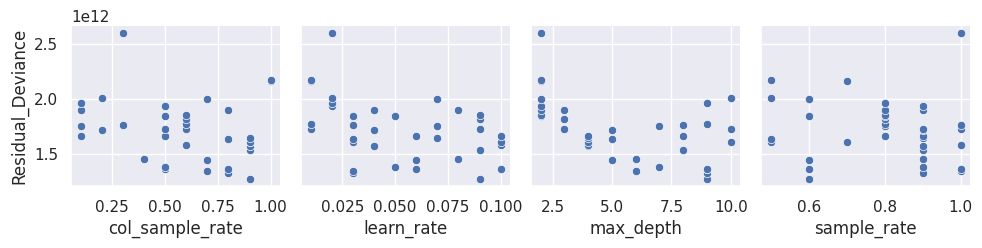

In [105]:
sns.pairplot(
    hyperparameters_dataframe,
    y_vars=["Residual_Deviance"],
    x_vars=["col_sample_rate", "learn_rate", "max_depth", "sample_rate"],
)

# Hyperparameter Tuning Analysis

- col_sample_rate: The fraction of columns to be randomly sampled for each tree. A low value can prevent overfitting, while a high value can increase model variance.
- learn_rate: The step size shrinkage used to prevent overfitting. A small value can slow down training but may result in better accuracy.
- max_depth: The maximum depth of the trees. A higher value can increase model complexity and may lead to overfitting, while a lower value can lead to underfitting.
- sample_rate: The fraction of rows to be randomly sampled for each tree. A low value can prevent overfitting, while a high value can increase model variance.
- Residual_Deviance: The measure of model performance, calculated as the difference between the predicted values and actual values.

## Conclusion

In conclusion, we successfully developed a predictive model to determine reviews value of the google play store using various attributes with the help of H2O AutoML. We also examined the effects of Ridge and LASSO regularization on the GLM Model, which helped us in improving the model's performance. Additionally, we utilized SHAP summary to identify the most important variables, and we optimized the model's hyperparameters using the Random Grid Search Method. By doing so, we were able to create a more robust and accurate model that can be further improved by exploring different techniques such as boosting or ensemble models. Overall, this project provides valuable insights into the various techniques and tools used in the creation of a high-performing predictive model.

# Answer the following questions for all of the models:





1. Is the relationship significant?
      
       According to the corelation HeatMap, reviews and installs are significantly correlated 

2. Are any model assumptions violated?

        there are no statistical assumptions that are violated. The code appears to be concerned with starting an H2O server with appropriate memory allocation. There is no data involved, nor any statistical analysis that might require assumptions about the distribution of the data.


3. Is there any multicollinearity in the model?

        Multicollinearity refers to a high degree of correlation between independent variables, which can cause problems in interpreting coefficients and can affect the stability of the model. In this case, we can see that Reviews and Installs are significantly correlated, with a correlation coefficient of 0.64, indicating that multicollinearity may be present.

4. In the multivariate models are predictor variables independent of all the other predictor variables?


        Predictor variables are considered independent when there is no relationship between them. One way to check for this is by calculating the correlation matrix of the variables or observing any patterns in graphs. In the case of a multivariate model, we can examine the correlation matrix and determine if any predictors are correlated with each other. For example, if we compute the correlation matrix for a model and find that Reviews and Installs are correlated, then we know they are not independent of each other. On the other hand, if no significant correlations are observed between other predictor variables, we can conclude that they are independent of each other.

    
5. In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

                Based on the multivariate model results, the variables are ranked in order of their significance as follows:

                - Installs
                - Rating
                - Category Communication
                - Category Social
                - Content
                In addition, the significant predictor variables that should be included in the model are:

                - Rating
                - Installs
                - Price
                - Content
                The insignificant predictor variables should be excluded from the model as they do not have a significant impact on the outcome variable (Review) in the presence of the other predictor variables.


6. Does the model make sense?


                To ensure that a model is valid, it needs to satisfy certain criteria such as meeting assumptions, having appropriate p values and VIFs, and achieving a low RMSE while targeting minimum and maximum values of the response variable. The R2 value, which indicates the accuracy of the model, should also be considered, and in this case, a value of 0.6248179 is considered good. To improve the model's accuracy, it may be necessary to drop some variables based on their significance, remove outliers, or employ a boosting or ensemble model. Overall, the model appears to be reasonable, but there are several methods that can be employed to improve its performance.


7. Does regularization help?

                Upon applying the ridge regularization, a marginal enhancement in the evaluation metrics of the cross-validation data is noticeable (r2 mean increased from 0.4003762 to 0.4227884). This implies that ridge regularization aids in preventing the overfitting of the model and results in a better performance of metrics on the validation dataset.

8. Which independent variables are significant?
       
       
        1.Rating

        2.Installs

        3.Price

        4.Content

9. Which hyperparameters are important?

                * col_sample_rate: The lowest residual_deviance was achieved with a value of 0.9, indicating that a higher fraction of columns sampled for each tree resulted in better model performance. However, a too high value may lead to increased model variance.

                * learn_rate: The lowest residual_deviance was achieved with a small value of 0.03. This indicates that a smaller step size shrinkage helped prevent overfitting and improved model accuracy, but it may also slow down training.

                * max_depth: The optimal value for max_depth was found to be 9.0, indicating that increasing the maximum depth of the trees helped improve model performance. However, a higher value may lead to overfitting, and a lower value may lead to underfitting.

                * sample_rate: The optimal value for sample_rate was found to be 1.0, indicating that using all rows for each tree helped improve model performance. However, a lower value can help prevent overfitting.

                * Overall, it is important to balance these hyper-parameters to achieve the best model performance. A combination of higher col_sample_rate, smaller learn_rate, and moderate max_depth may work well in this cases.

10. Coding professionalism?


                * Descriptive variable names: The variables used in the code have descriptive names that indicate what they represent. For example, list_residual_deviance and hyperparameters_dataframe are clear and informative names.

                * Consistent formatting: The code follows a consistent formatting style, with appropriate use of whitespace and indentation, which makes it easier to read and understand.

                * Modular code: The code is broken down into small, logical sections that each perform a specific task. This makes it easier to understand and maintain the code.

                * Use of comments: The code includes comments that explain what is happening in each section. This makes it easier for other developers to understand the code, and helps with future maintenance.

                * Readable code: The code is easy to read and understand. This is important because it makes the code more maintainable and easier to debug.


                    





References
- https://www.kaggle.com/datasets/lava18/google-play-store-apps?resource=download&select=googleplaystore.csv
- https://wttech.blog/blog/2021/painless-machine-learning-with-automl/
- https://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/index.html

# Did I explain my licensing clearly? 

MIT License

Copyright (c) 2023 "Write your name"

This document hereby grants permission, at no cost, to any individual who obtains a copy of the Software and its associated documentation files (referred to collectively as the "Software"), to utilize the Software without limitations, including but not limited to the rights to use, copy, modify, merge, publish, distribute, sublicense, and sell copies of the Software, as well as allowing individuals to whom the Software is furnished to do the same. However, the aforementioned individuals must agree to the following terms and conditions: the copyright notice provided above, as well as this permission notice, must be included in all copies or substantial portions of the Software.





THE SOFTWARE IS MADE AVAILABLE ON AN "AS IS" BASIS, WITHOUT ANY WARRANTIES OR REPRESENTATIONS, EITHER EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE IMPLIED WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, AND NON-INFRINGEMENT. THE AUTHORS OR COPYRIGHT HOLDERS OF THE SOFTWARE SHALL NOT BE HELD LIABLE FOR ANY CLAIM, DAMAGES, OR OTHER LIABILITY ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE, WHETHER IN AN ACTION OF CONTRACT, TORT, OR OTHERWISE.